In [1]:
# - israelPalestine ['israelPalestineW26', 'israelPalestineW27', 'israelPalestineW28']

In [2]:
# israelPalestine, handleGazaGov, handleGazaLab
# warmJewish, warmMuslims W11W15W26
# (lab|con)LookAfter(Jews|Muslims) W15W26

# p_religion_(Islam|Judaism)

In [3]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [4]:
def nice_hatch_chart(temp,title,hue="wave",value="value",hatches = ["//", "\\\\", "+","x","*","o","|","-","/",".","O","\\"]):
    fig = plt.figure(figsize=(8,4));
    ax = plt.gca()
    ax = sns.histplot(data=temp,x=value,weights="wt",stat='percent',hue=hue,multiple="dodge", common_norm=False, shrink=.8,ax=ax);
    plt.title(title);
    plt.ylabel("%");
    plt.xlabel("");

    
    # iterate through each container, hatch, and legend handle
    for container, hatch, handle in zip(ax.containers, hatches, ax.get_legend().legend_handles[::-1]):
        # update the hatching in the legend handle
        handle.set_hatch(hatch)
        # iterate through each rectangle in the container
        for rectangle in container:
            # set the rectangle hatch
            rectangle.set_hatch(hatch)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    wrap_labels(ax, 10);
    plt.show()

In [5]:
%%time
dataset_name = "W26_only"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
# BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (527, 13)
CPU times: total: 1.12 s
Wall time: 34.6 s


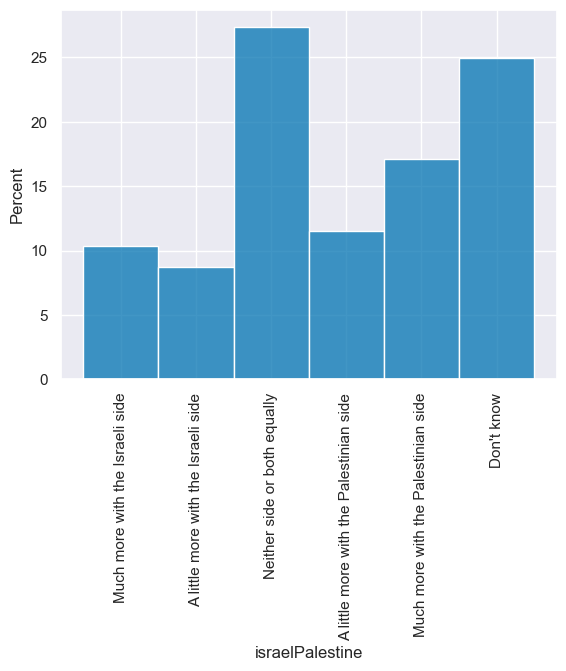

In [6]:
sns.histplot(x=BES_Panel["israelPalestine"],weights=BES_Panel["wt"],stat='percent');
plt.xticks(rotation=90);

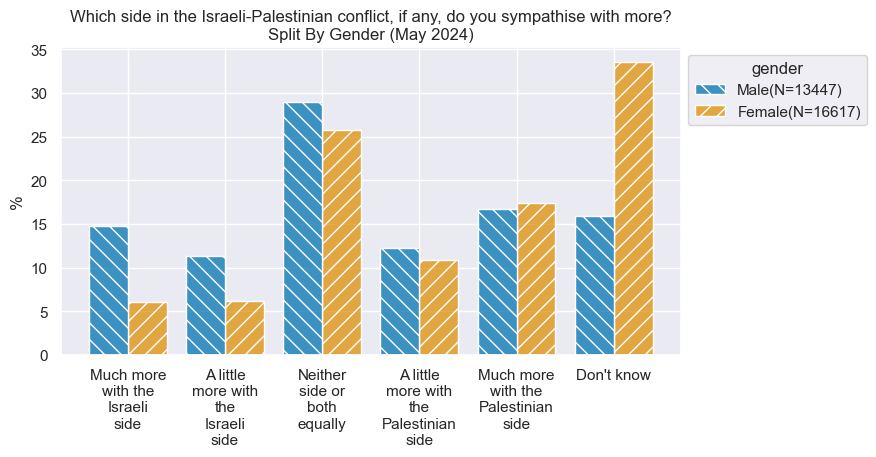

In [7]:
temp = BES_Panel[["gender","israelPalestine","wt"]].dropna()
vc = temp["gender"].value_counts()
temp["gender"] = temp["gender"].apply(lambda x: x+"(N="+str(vc.loc[x])+")")
title = "Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\nSplit By Gender (May 2024)"
# temp.
nice_hatch_chart(temp,title,hue="gender",value="israelPalestine")

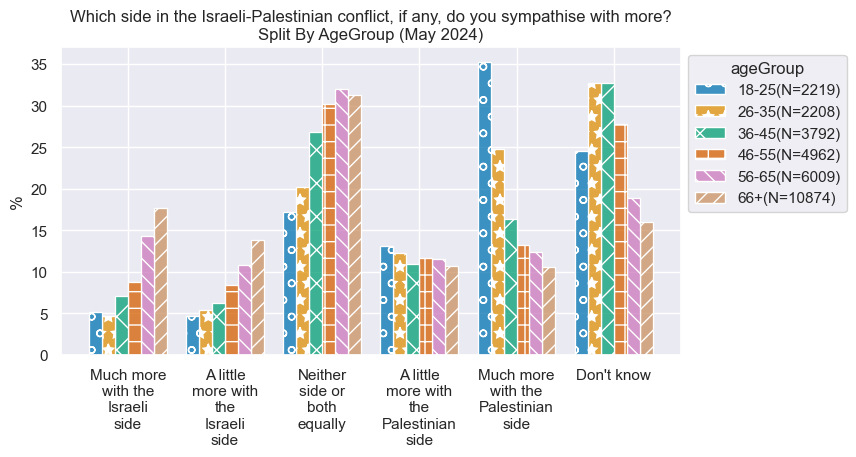

In [8]:
variable = "ageGroup"
value = "israelPalestine"
temp = BES_Panel[[variable,value,"wt"]].dropna()
vc = temp[variable].value_counts()
temp[variable] = temp[variable].apply(lambda x: x+"(N="+str(vc.loc[x])+")")
title = "Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\nSplit By AgeGroup (May 2024)"
# temp.
nice_hatch_chart(temp,title,hue=variable,value=value)

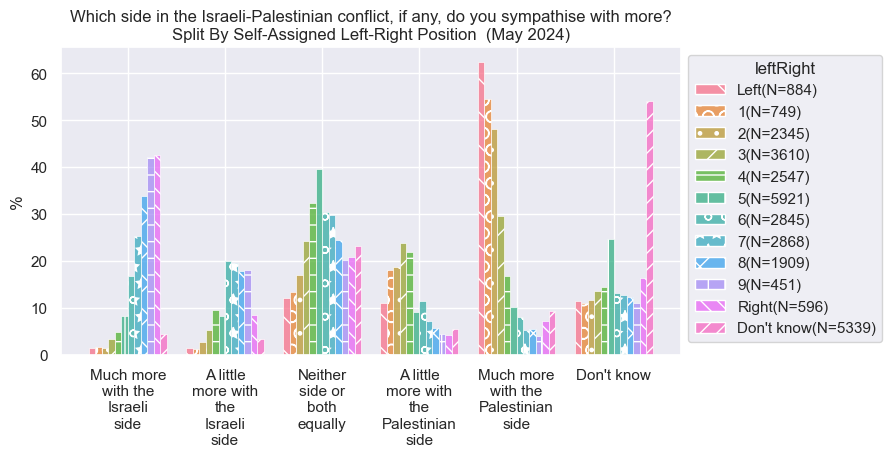

In [9]:
variable = "leftRight"
value = "israelPalestine"
temp = BES_Panel[[variable,value,"wt"]].dropna()
vc = temp[variable].value_counts()
temp[variable] = temp[variable].apply(lambda x: x+"(N="+str(vc.loc[x])+")")
title = "Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\nSplit By Self-Assigned Left-Right Position  (May 2024)"
# temp.
nice_hatch_chart(temp,title,hue=variable,value=value )

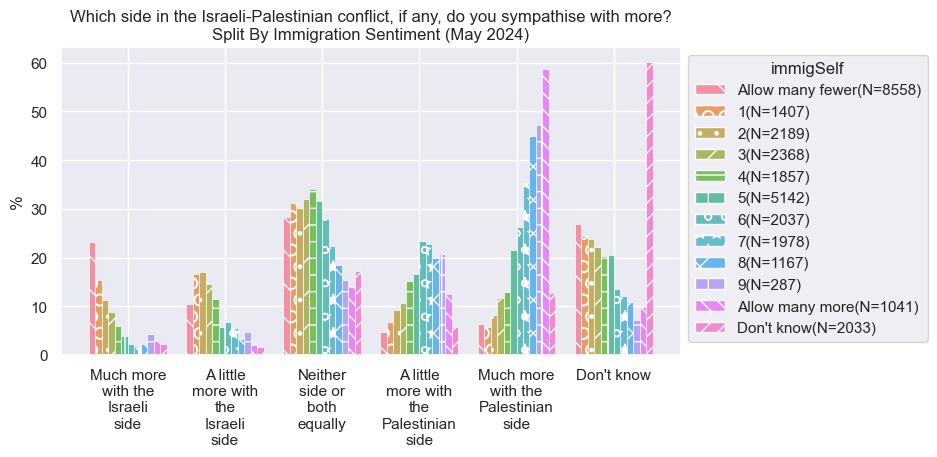

In [10]:
variable = "immigSelf"
value = "israelPalestine"
temp = BES_Panel[[variable,value,"wt"]].dropna()
vc = temp[variable].value_counts()
temp[variable] = temp[variable].apply(lambda x: x+"(N="+str(vc.loc[x])+")")
title = "Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\nSplit By Immigration Sentiment (May 2024)"
# temp.
nice_hatch_chart(temp,title,hue=variable,value=value )

In [11]:
# ## ugly!
# ax = sns.histplot(x=BES_Panel["israelPalestine"],weights=BES_Panel["wt"],stat='percent',hue=BES_Panel["p_ethnicity"],multiple="dodge",
#                   common_norm=False,shrink=.8);
# plt.xticks(rotation=90);
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

In [12]:
BES_Panel["israelPalestine"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).groupby(BES_Panel["p_ethnicity"]).mean().sort_values()

p_ethnicity
White British                 2.085188
Prefer not to say             2.246106
Chinese                       2.348214
Any other white background    2.415272
Indian                        2.542105
White and Black African       2.543478
Any other mixed background    2.614679
Black Caribbean               2.630000
Other ethnic group            2.659574
White and Asian               2.695312
Any other Asian background    2.747368
Any other black background    2.782609
Black African                 2.848485
White and Black Caribbean     2.942857
Bangladeshi                   3.326087
Pakistani                     3.433121
dtype: float64

In [13]:
replace_dict = {'White British':"White Brit", 'Any other white background':"Other White",
       'White and Black Caribbean':np.nan, 'White and Black African':np.nan,
       'White and Asian':"White and Asian", 'Any other mixed background':np.nan, 'Indian':"Indian", 'Pakistani':"Bangladesh+Pakistani",
       'Bangladeshi':"Bangladesh+Pakistani", 'Any other Asian background':np.nan, 'Black Caribbean':np.nan,
       'Black African':"Black African", 'Any other black background':np.nan, 'Chinese':"Chinese",
       'Other ethnic group':"Other", 'Prefer not to say':np.nan}
BES_Panel["p_ethnicity_short"] = BES_Panel["p_ethnicity"].astype('object').replace(replace_dict).astype('category')


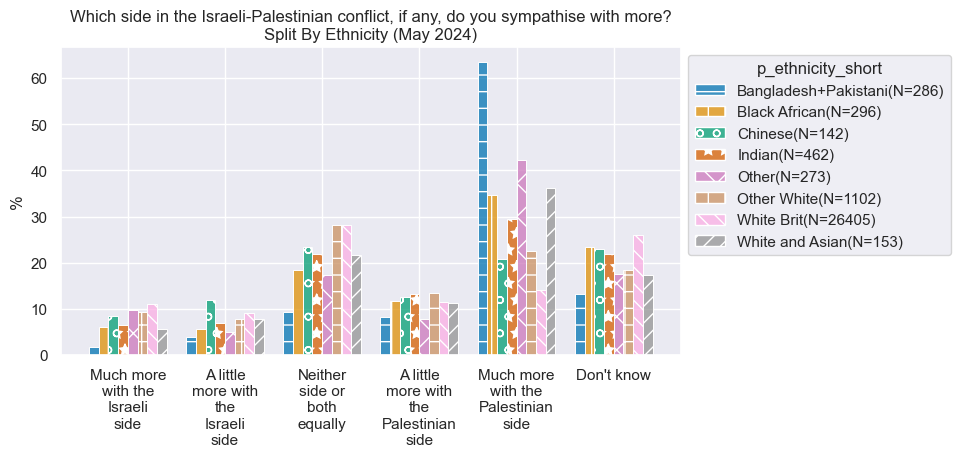

In [14]:
variable = "p_ethnicity_short"
value = "israelPalestine"
temp = BES_Panel[[variable,value,"wt"]].dropna()
vc = temp[variable].value_counts()
temp[variable] = temp[variable].apply(lambda x: x+"(N="+str(vc.loc[x])+")")
title = "Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\nSplit By Ethnicity (May 2024)"
# temp.
nice_hatch_chart(temp,title,hue=variable,value=value )

In [15]:
BES_Panel["p_religion"].cat.categories

replace_dict = {'No, I do not regard myself as belonging to any particular religion.':"None",
       'Yes - Church of England/Anglican/Episcopal':"Anglican", 'Yes - Roman Catholic':"Catholic",
       'Yes - Presbyterian/Church of Scotland':"Presbyterian", 'Yes - Methodist':"Methodist",
       'Yes - Baptist':"Baptist", 'Yes - United Reformed Church':np.nan,
       'Yes - Free Presbyterian':np.nan, 'Yes - Brethren':np.nan, 'Yes - Judaism':"Judaism",
       'Yes - Hinduism':np.nan, 'Yes - Islam':"Islam", 'Yes - Sikhism':np.nan, 'Yes - Buddhism':np.nan,
       'Yes - Other':np.nan, 'Prefer not to say':np.nan, 'Yes – Orthodox Christian':np.nan,
       'Yes - Pentecostal (e.g. Assemblies of God, Elim Pentecostal Church, New Testament Church of God, Redeemed Christian Church of God)':np.nan,
       'Yes - Evangelical – independent/non-denominational (e.g. FIEC, Pioneer, Vineyard, Newfrontiers)':"Evangelical"}
BES_Panel["p_religion_short"] = BES_Panel["p_religion"].astype('object').replace(replace_dict).astype('category')

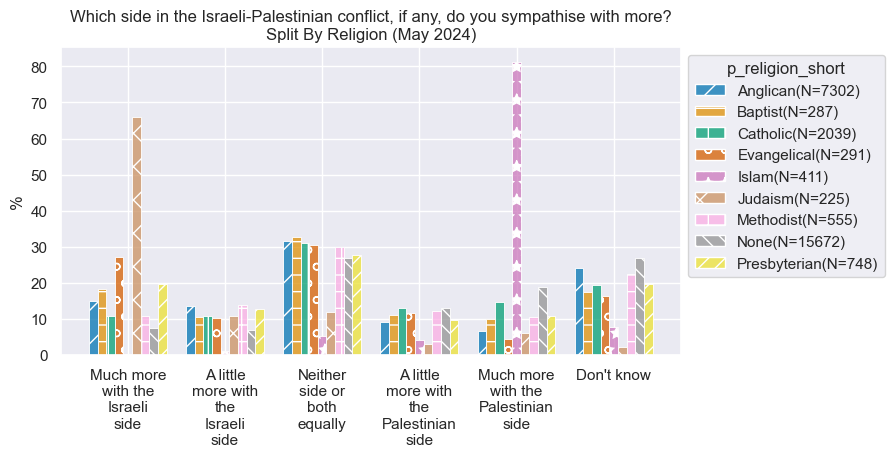

In [16]:
variable = "p_religion_short"
value = "israelPalestine"
temp = BES_Panel[[variable,value,"wt"]].dropna()
vc = temp[variable].value_counts()
temp[variable] = temp[variable].apply(lambda x: x+"(N="+str(vc.loc[x])+")")
title = "Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\nSplit By Religion (May 2024)"
# temp.
nice_hatch_chart(temp,title,hue=variable,value=value )

In [17]:
# sns.histplot(x=BES_Panel["handleGazaGov"],weights=BES_Panel["wt"],stat='percent');
# plt.xticks(rotation=90);

In [18]:
# sns.histplot(x=BES_Panel["handleGazaLab"],weights=BES_Panel["wt"],stat='percent');
# plt.xticks(rotation=90);

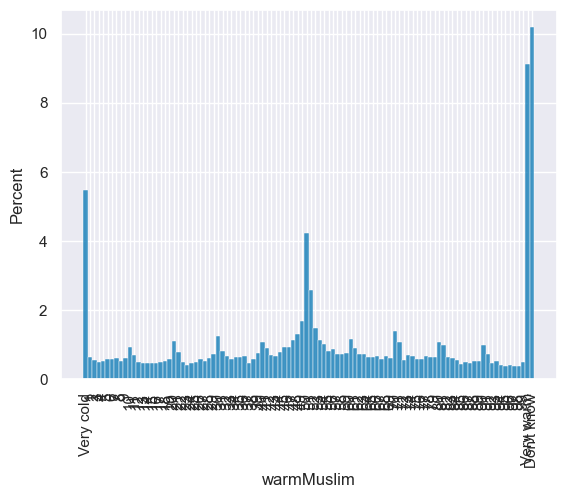

In [19]:
sns.histplot(x=BES_Panel["warmMuslim"],weights=BES_Panel["wt"],stat='percent');
plt.xticks(rotation=90);

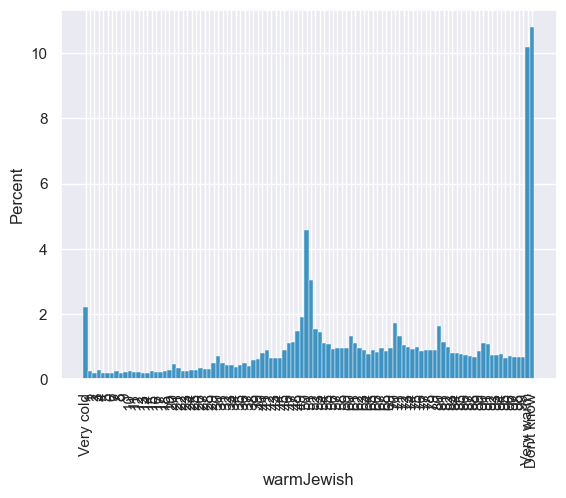

In [20]:
sns.histplot(x=BES_Panel["warmJewish"],weights=BES_Panel["wt"],stat='percent');
plt.xticks(rotation=90);

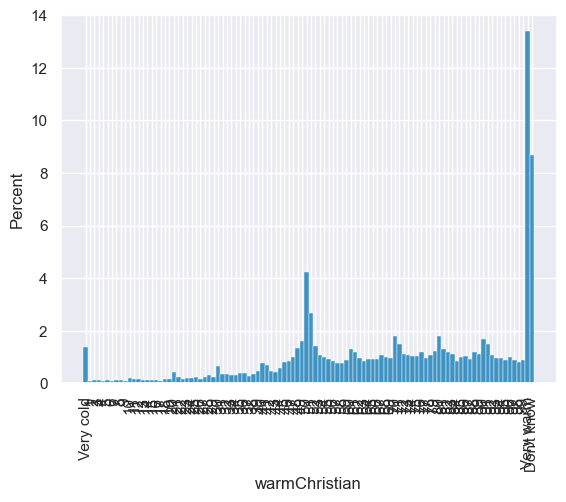

In [21]:
sns.histplot(x=BES_Panel["warmChristian"],weights=BES_Panel["wt"],stat='percent');
plt.xticks(rotation=90);

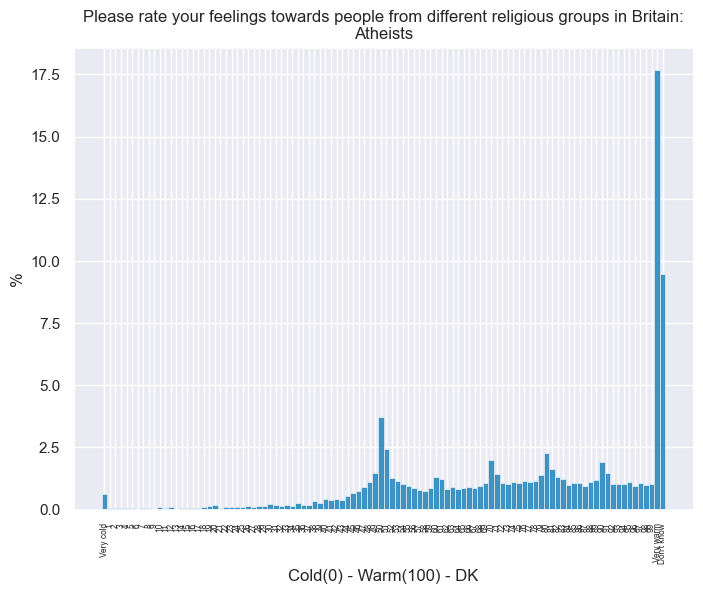

In [22]:
plt.figure(figsize=(8,6));
sns.histplot(x=BES_Panel["warmAtheist"],weights=BES_Panel["wt"],stat='percent');
plt.xticks(rotation=90,fontsize=6);
plt.ylabel("%");
plt.xlabel("Cold(0) - Warm(100) - DK");
plt.title("Please rate your feelings towards people from different religious groups in Britain:\nAtheists");

In [23]:
search(BES_Panel,"warm")

warmMuslim       30064
warmChristian    30064
warmJewish       30064
warmAtheist      30064
dtype: int64

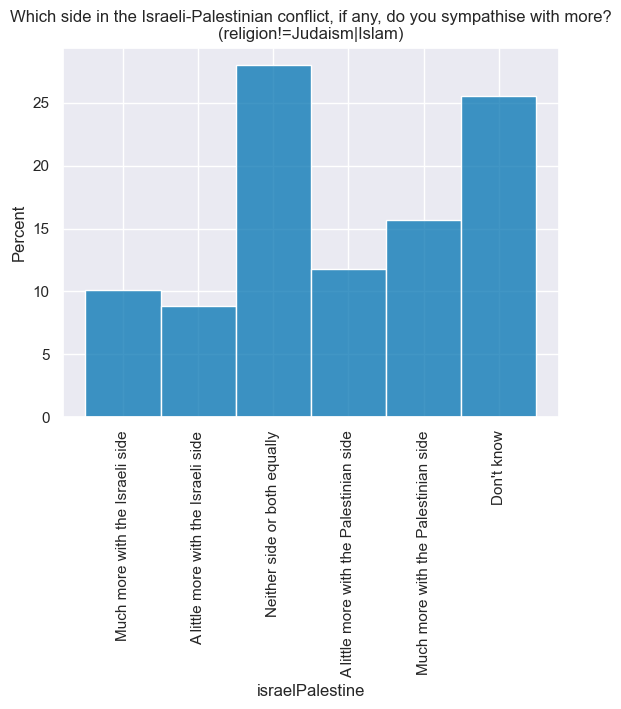

In [24]:
mask = ~BES_Panel["p_religion"].isin(["Yes - Judaism","Yes - Islam"])
sns.histplot(x=BES_Panel["israelPalestine"][mask],weights=BES_Panel["wt"][mask],stat='percent');
plt.xticks(rotation=90);
plt.title("Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\n(religion!=Judaism|Islam)");

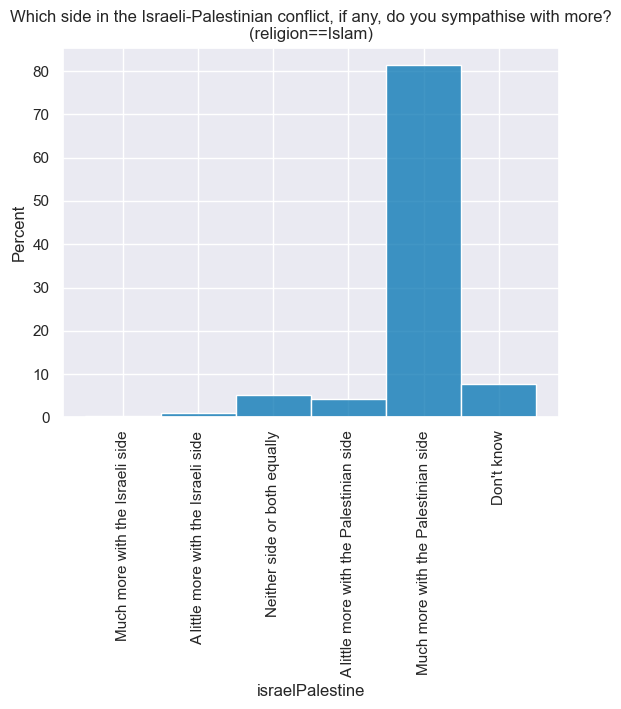

In [25]:
mask = BES_Panel["p_religion"]=="Yes - Islam"
sns.histplot(x=BES_Panel["israelPalestine"][mask],weights=BES_Panel["wt"][mask],stat='percent');
plt.xticks(rotation=90);
plt.title("Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\n(religion==Islam)");

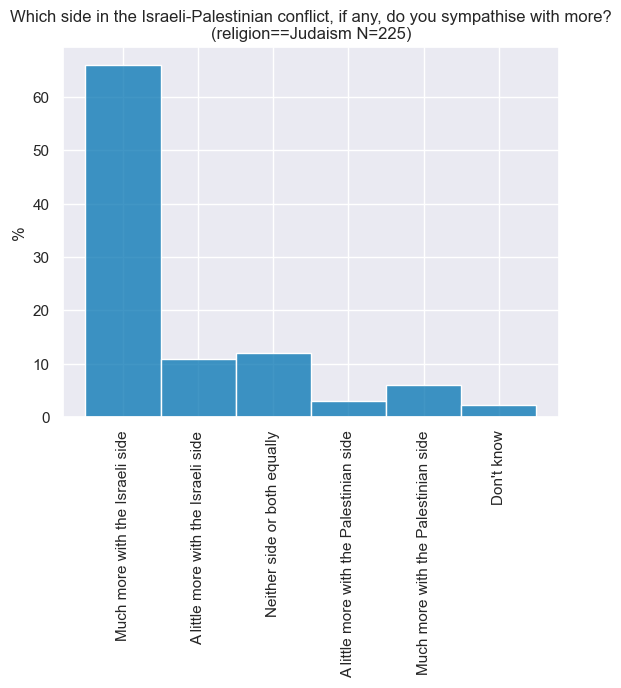

In [26]:
mask = BES_Panel["p_religion"]=="Yes - Judaism"
sns.histplot(x=BES_Panel["israelPalestine"][mask],weights=BES_Panel["wt"][mask],stat='percent');
plt.xticks(rotation=90);
plt.title("Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\n(religion==Judaism N="+\
          str(mask.sum())+")");
plt.ylabel("%");
plt.xlabel("");

In [27]:
# BES_Panel["p_religion"].value_counts()

In [28]:
search(BES_Panel,"lr.*")

liverpoolRegionFPTP      382
econPersonalRetro      30064
lrCon                  30064
lrLab                  30064
lrLD                   30064
lrSNP                   3034
lrPC                    1955
lrgreens               30064
lrBrexit               30064
lr1                    22491
lr2                    22491
lr3                    22491
lr4                    22491
lr5                    22491
lr_scale               20097
LRAL_mii_cat_llm       27815
dtype: int64

In [29]:
weighted_value_counts(BES_Panel["lrCon"],BES_Panel["wt"],normalize=True,perc=True)

weighted_sample_percentage  raw_sample_size
lrCon                                                  
1                                 0.53            146.0
2                                 1.10            308.0
3                                 1.47            421.0
Left                              1.67            385.0
4                                 1.93            567.0
5                                 4.78           1436.0
6                                 6.52           1982.0
9                                10.01           3556.0
7                                12.79           3978.0
8                                15.52           5230.0
Right                            17.74           6135.0
Don't know                       25.93           5920.0

In [30]:
pd.crosstab(BES_Panel["israelPalestine"],BES_Panel["handleGazaGov"],values=BES_Panel["wt"],aggfunc=sum,normalize='all',margins=True)*100

handleGazaGov                            Very badly  Fairly badly  \
israelPalestine                                                     
Much more with the Israeli side            0.899513      1.290719   
A little more with the Israeli side        0.321420      1.005723   
Neither side or both equally               2.646990      5.399759   
A little more with the Palestinian side    2.531954      4.390357   
Much more with the Palestinian side       11.391330      3.672886   
Don't know                                 1.637900      2.264744   
All                                       19.429107     18.024188   

handleGazaGov                            Neither well nor badly  Fairly well  \
israelPalestine                                                                
Much more with the Israeli side                        2.898879     3.656847   
A little more with the Israeli side                    3.322634     3.139884   
Neither side or both equally                          10.714720     3.925037   
A little more with the Palestinian side                2.822568     0.803874   
Much more with the Palestinian side                    1.100584     0.291047   
Don't know                                             5.837763     1.340094   
All                                                   26.697149    13.156783   

handleGazaGov                            Very well  Don't know         All  
israelPalestine                                                             
Much more with the Israeli side           0.967193    0.608300   10.321452  
A little more with the Israeli side       0.244206    0.690384    8.724251  
Neither side or both equally              0.287890    4.361239   27.335635  
A little more with the Palestinian side   0.054247    0.935874   11.538874  
Much more with the Palestinian side       0.025953    0.603906   17.085706  
Don't know                                0.123242   13.790339   24.994083  
All                                       1.702731   20.990042  100.000000

In [31]:
pd.crosstab(BES_Panel["israelPalestine"],BES_Panel["handleGazaLab"],values=BES_Panel["wt"],aggfunc=sum,normalize='all',margins=True)*100

handleGazaLab                            Very badly  Fairly badly  \
israelPalestine                                                     
Much more with the Israeli side            3.337741      2.380849   
A little more with the Israeli side        1.078003      2.126486   
Neither side or both equally               2.572372      5.540763   
A little more with the Palestinian side    1.321372      3.383837   
Much more with the Palestinian side        6.960986      4.287258   
Don't know                                 1.391248      1.641503   
All                                       16.661721     19.360696   

handleGazaLab                            Neither well nor badly  Fairly well  \
israelPalestine                                                                
Much more with the Israeli side                        2.378869     0.786930   
A little more with the Israeli side                    2.937538     0.943399   
Neither side or both equally                           9.929904     1.902497   
A little more with the Palestinian side                3.670461     0.731212   
Much more with the Palestinian side                    2.477632     0.478549   
Don't know                                             4.804475     0.597343   
All                                                   26.198878     5.439930   

handleGazaLab                            Very well  Don't know         All  
israelPalestine                                                             
Much more with the Israeli side           0.171358    1.265705   10.321452  
A little more with the Israeli side       0.065305    1.573520    8.724251  
Neither side or both equally              0.184865    7.205233   27.335635  
A little more with the Palestinian side   0.042158    2.389835   11.538874  
Much more with the Palestinian side       0.114634    2.766647   17.085706  
Don't know                                0.059081   16.500433   24.994083  
All                                       0.637402   31.701373  100.000000

In [32]:
# handleGazaGov, handleGazaLab W26
# How well do you think the **UK Government** has handled Britain’s response to the conflict in Gaza?
# And how well do you think the **Labour Party** has responded to the conflict in Gaza?
# warmJewish
# warmMuslim


In [33]:
search(BES_reduced_with_na,"p_ethnicity")

p_ethnicity_White British                 29675
p_ethnicity_Any other white background    29675
p_ethnicity_Indian                        29675
p_ethnicity_Black African                 29675
p_ethnicity_Other ethnic group            29675
p_ethnicity_Pakistani                     29675
p_ethnicity_White and Asian               29675
p_ethnicity_Chinese                       29675
p_ethnicity_Any other mixed background    29675
p_ethnicity_Black Caribbean               29675
p_ethnicity_Bangladeshi                   29675
p_ethnicity_Any other Asian background    29675
p_ethnicity_White and Black Caribbean     29675
p_ethnicity_White and Black African       29675
p_ethnicity_Any other black background    29675
dtype: int64

Top 20 positive (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 likeYousaf__Strongly like 
 0.510000 
 0.00 
 2418 
 
 
 asylumMore__Many more 
 0.490000 
 0.00 
 5576 
 
 
 ptvSNP__Very likely 
 0.490000 
 0.00 
 2450 
 
 
 likeGrn__Strongly like 
 0.490000 
 0.00 
 21918 
 
 
 immigSelf__Allow many more 
 0.490000 
 0.00 
 22684 
 
 
 likeSNP__Strongly like 
 0.480000 
 0.00 
 2481 
 
 
 immigEcon__Good for economy 
 0.470000 
 0.00 
 22618 
 
 
 scotReferendumIntention__Would not vote 
 0.470000 
 0.00 
 2337 
 
 
 approveScotGovt__Strongly approve 
 0.470000 
 0.00 
 2474 
 
 
 familiesMore__Many more 
 0.460000 
 0.00 
 5556 
 
 
 ptvGrn__Very likely 
 0.450000 
 0.00 
 22355 
 
 
 likeSwinney__Strongly like 
 0.440000 
 0.00 
 2290 
 
 
 likeDenyer__Strongly like 
 0.440000 
 0.00 
 3690 
 
 
 londonMayorVoteFPTP_Sadiq Khan (Labour) 
 0.430000 
 0.00 
 1609 
 
 
 cwAuthors__Strongly agree 
 0.430000 
 0.00 
 22352 
 
 
 labHandleImmig__Very well 
 0.420000 
 0.00 
 21110 
 
 
 labLookAfterJews__Very closely 
 0.400000 
 0.00 
 17640 
 
 
 studentsMore__Many more 
 0.400000 
 0.00 
 5581 
 
 
 enviroGrowth__Protecting the environment should[...] 
 0.390000 
 0.00 
 22647 
 
 
 cwParents__Strongly agree 
 0.380000 
 0.00 
 22542 
 
 
 

 
 Top 20 negative (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 handleGazaGov__Very well 
 -0.570000 
 0.00 
 21675 
 
 
 leftRight__Right 
 -0.550000 
 0.00 
 21004 
 
 
 londonMayorVoteFPTP_Susan Hall (Conservative) 
 -0.520000 
 0.00 
 1609 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.490000 
 0.00 
 22826 
 
 
 likeFarageFormer__Strongly like 
 -0.490000 
 0.00 
 5787 
 
 
 likeBrexitParty__Strongly like 
 -0.480000 
 0.00 
 20459 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.480000 
 0.00 
 20930 
 
 
 conLookAfterMuslims__Very closely 
 -0.470000 
 0.00 
 17753 
 
 
 p_past_vote_2019_Conservative 
 -0.450000 
 0.00 
 20143 
 
 
 cwStatues__Strongly agree 
 -0.440000 
 0.00 
 22669 
 
 
 likeTice__Strongly like 
 -0.440000 
 0.00 
 12180 
 
 
 likeCon__Strongly like 
 -0.440000 
 0.00 
 23207 
 
 
 ptvBrexitParty__Very likely 
 -0.440000 
 0.00 
 21940 
 
 
 ptvCon__Very likely 
 -0.430000 
 0.00 
 22728 
 
 
 enviroProtection__Gone much too far 
 -0.420000 
 0.00 
 22334 
 
 
 labLookAfterMuslims__Very closely 
 -0.420000 
 0.00 
 17405 
 
 
 cwTraining__Strongly agree 
 -0.420000 
 0.00 
 21833 
 
 
 al_scale__Authoritarian 
 -0.420000 
 0.00 
 15647 
 
 
 pccVote1_The Conservative candidate 
 -0.410000 
 0.00 
 8819 
 
 
 p_past_vote_2017_Conservative 
 -0.400000 
 0.00 
 19323

MSE: 0.66, MAE: 0.63, EV: 0.60, R2: 0.60


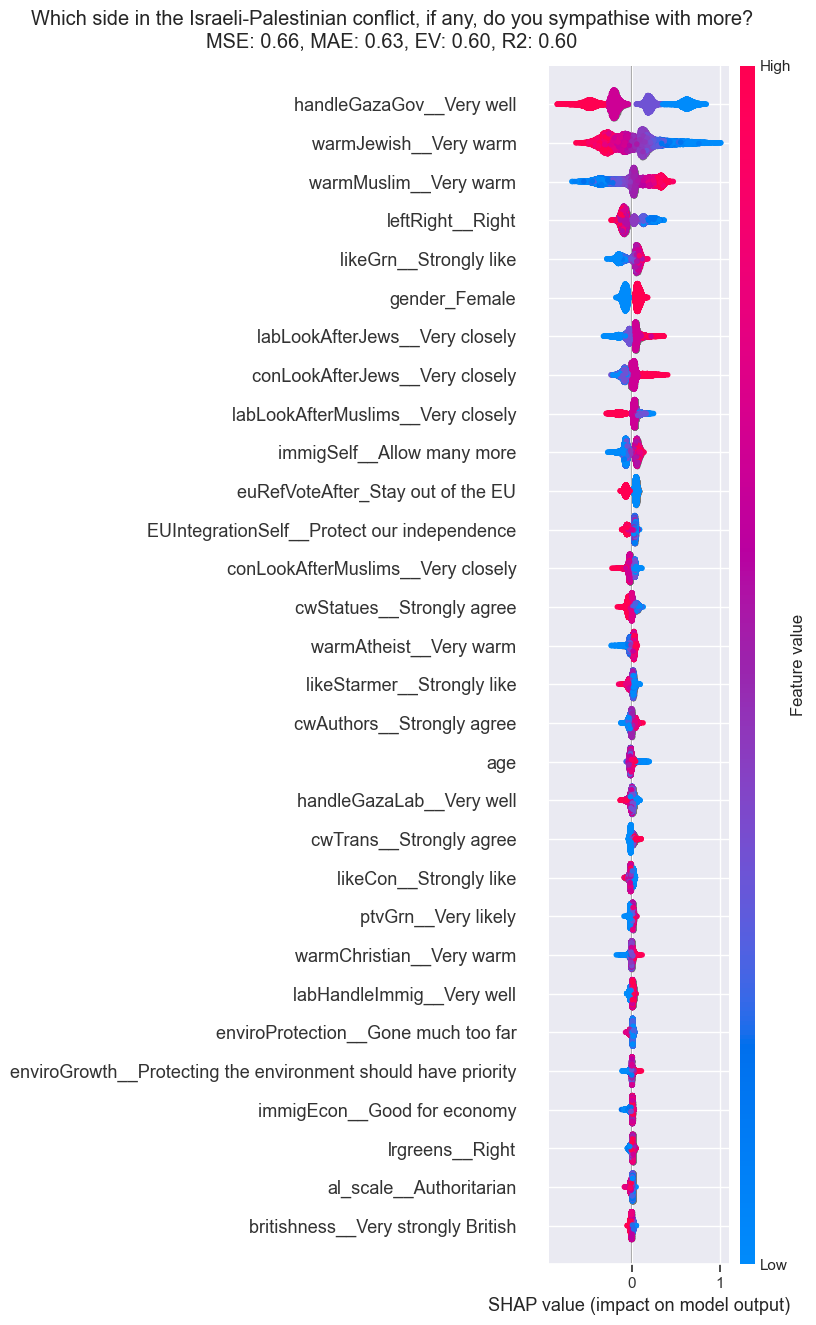

In [34]:
name="israelPalestine__Much more with the Palestinian side"
pattern = "israelPalestine"
mask = ~BES_Panel["p_religion"].isin(["Yes - Judaism","Yes - Islam"])
df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?",
                                                    dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],var_stub_list = [name,pattern],verbosity=0)

MSE: 0.84, MAE: 0.70, EV: 0.30, R2: 0.29


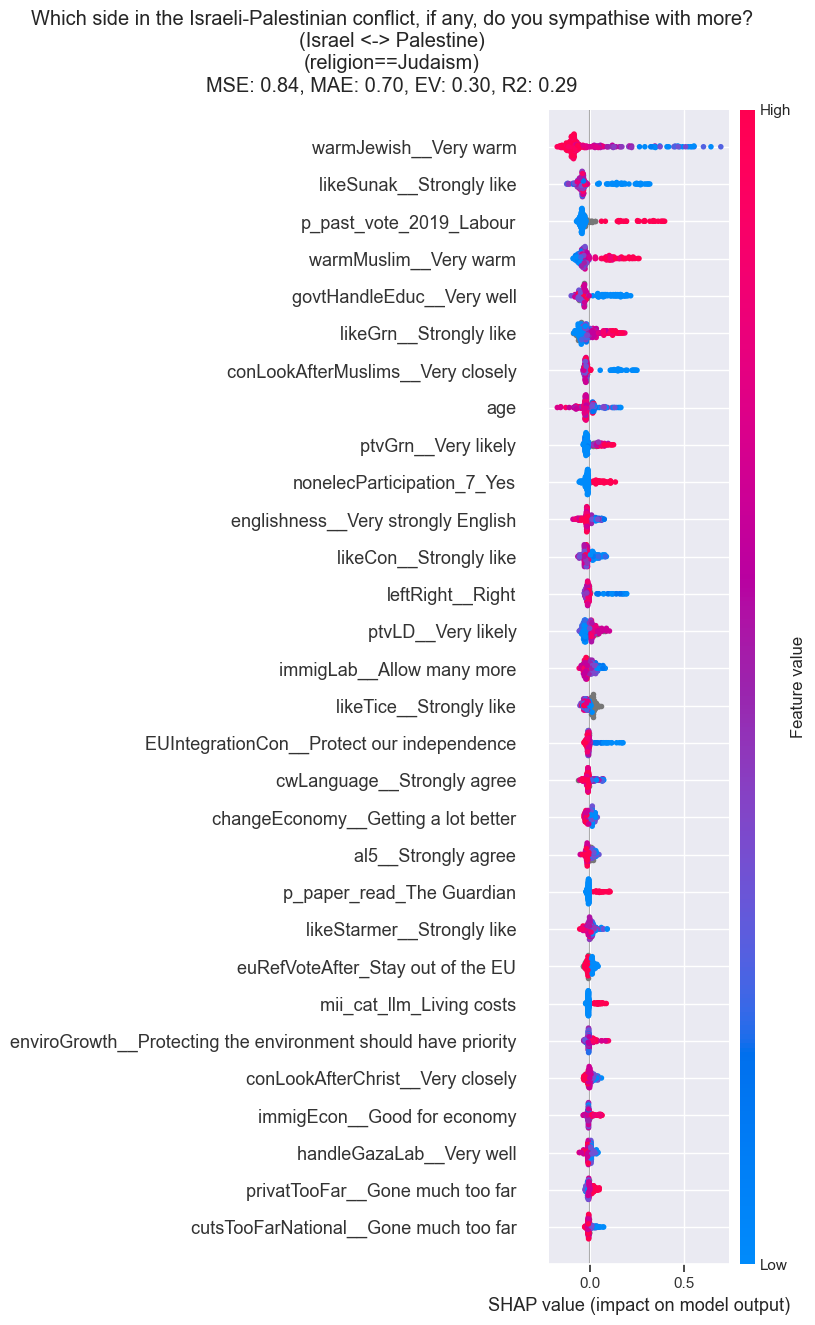

In [35]:
name="israelPalestine__Much more with the Palestinian side"
pattern = "israelPalestine"
mask = BES_Panel["p_religion"] =="Yes - Judaism"
# df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name, pattern=pattern)
# display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\n(Israel <-> Palestine)\n(religion==Judaism)",
                                                    dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],var_stub_list = [name,pattern],verbosity=0)

MSE: 0.26, MAE: 0.28, EV: 0.41, R2: 0.41


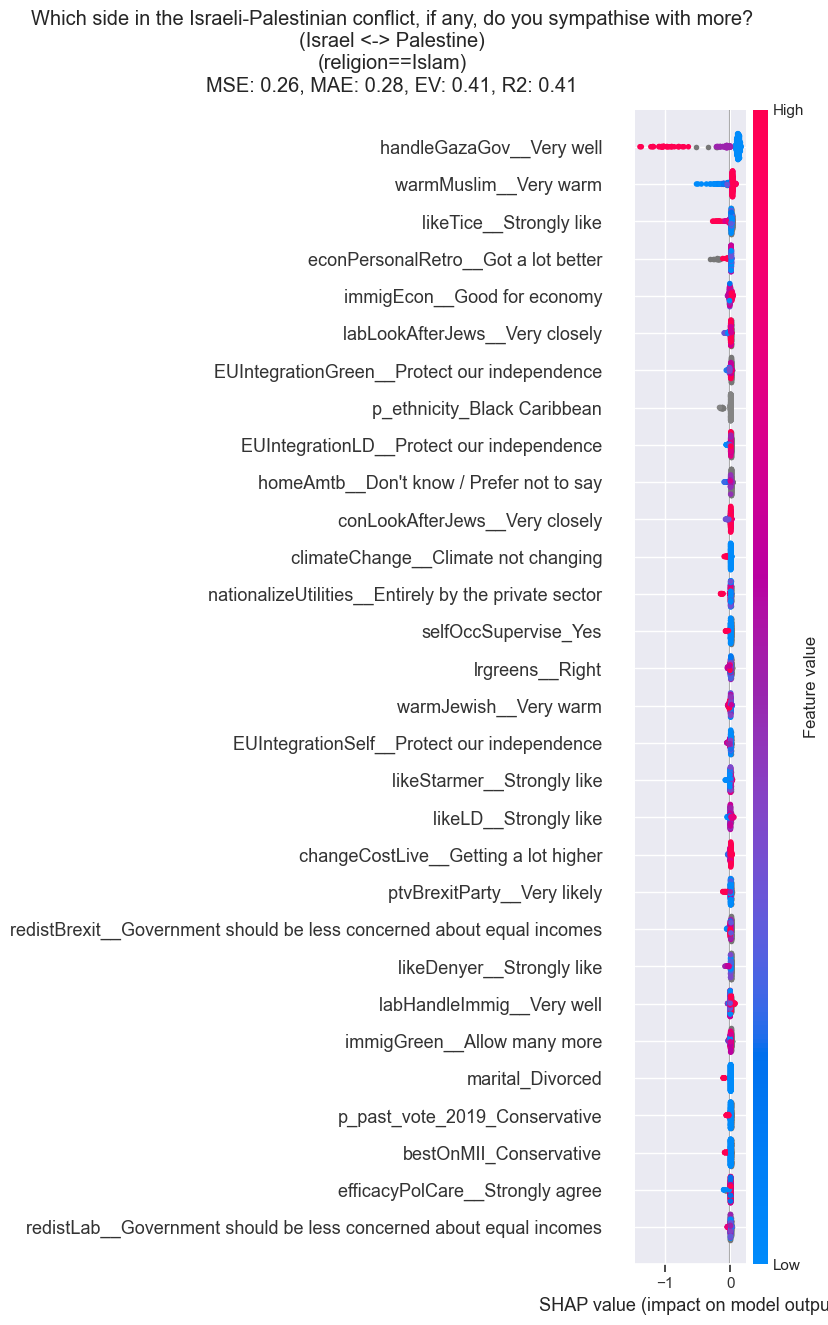

In [36]:
name="israelPalestine__Much more with the Palestinian side"
pattern = "israelPalestine"
mask = BES_Panel["p_religion"] =="Yes - Islam"
# df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name, pattern=pattern)
# display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?\n(Israel <-> Palestine)\n(religion==Islam)",
                                                    dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],var_stub_list = [name,pattern],verbosity=0)

Top 20 positive (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 likeYousaf__Strongly like 
 0.510000 
 0.00 
 2434 
 
 
 asylumMore__Many more 
 0.480000 
 0.00 
 5707 
 
 
 ptvSNP__Very likely 
 0.480000 
 0.00 
 2466 
 
 
 likeGrn__Strongly like 
 0.480000 
 0.00 
 22446 
 
 
 likeSNP__Strongly like 
 0.480000 
 0.00 
 2497 
 
 
 immigSelf__Allow many more 
 0.480000 
 0.00 
 23236 
 
 
 scotReferendumIntention__Would not vote 
 0.470000 
 0.00 
 2352 
 
 
 approveScotGovt__Strongly approve 
 0.470000 
 0.00 
 2490 
 
 
 immigEcon__Good for economy 
 0.460000 
 0.00 
 23184 
 
 
 familiesMore__Many more 
 0.460000 
 0.00 
 5690 
 
 
 ptvGrn__Very likely 
 0.450000 
 0.00 
 22894 
 
 
 likeSwinney__Strongly like 
 0.440000 
 0.00 
 2302 
 
 
 londonMayorVoteFPTP_Sadiq Khan (Labour) 
 0.440000 
 0.00 
 1749 
 
 
 cwAuthors__Strongly agree 
 0.430000 
 0.00 
 22898 
 
 
 likeDenyer__Strongly like 
 0.420000 
 0.00 
 3805 
 
 
 labHandleImmig__Very well 
 0.410000 
 0.00 
 21632 
 
 
 labLookAfterJews__Very closely 
 0.410000 
 0.00 
 18151 
 
 
 studentsMore__Many more 
 0.390000 
 0.00 
 5720 
 
 
 labHandleEcon__Very well 
 0.380000 
 0.00 
 21886 
 
 
 enviroGrowth__Protecting the environment should[...] 
 0.380000 
 0.00 
 23195 
 
 
 

 
 Top 20 negative (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 handleGazaGov__Very well 
 -0.580000 
 0.00 
 22266 
 
 
 leftRight__Right 
 -0.540000 
 0.00 
 21492 
 
 
 londonMayorVoteFPTP_Susan Hall (Conservative) 
 -0.520000 
 0.00 
 1749 
 
 
 conLookAfterMuslims__Very closely 
 -0.480000 
 0.00 
 18279 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.480000 
 0.00 
 23371 
 
 
 likeFarageFormer__Strongly like 
 -0.480000 
 0.00 
 5913 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.470000 
 0.00 
 21422 
 
 
 likeBrexitParty__Strongly like 
 -0.470000 
 0.00 
 20952 
 
 
 p_past_vote_2019_Conservative 
 -0.450000 
 0.00 
 20584 
 
 
 ptvCon__Very likely 
 -0.440000 
 0.00 
 23285 
 
 
 likeCon__Strongly like 
 -0.440000 
 0.00 
 23787 
 
 
 cwStatues__Strongly agree 
 -0.440000 
 0.00 
 23213 
 
 
 likeTice__Strongly like 
 -0.440000 
 0.00 
 12475 
 
 
 labLookAfterMuslims__Very closely 
 -0.430000 
 0.00 
 17928 
 
 
 ptvBrexitParty__Very likely 
 -0.430000 
 0.00 
 22471 
 
 
 cwTraining__Strongly agree 
 -0.410000 
 0.00 
 22372 
 
 
 pccVote1_The Conservative candidate 
 -0.410000 
 0.00 
 8944 
 
 
 al_scale__Authoritarian 
 -0.400000 
 0.00 
 16058 
 
 
 p_past_vote_2017_Conservative 
 -0.400000 
 0.00 
 19706 
 
 
 enviroProtection__Gone much too far 
 -0.400000 
 0.00 
 22870

MSE: 0.66, MAE: 0.63, EV: 0.61, R2: 0.61


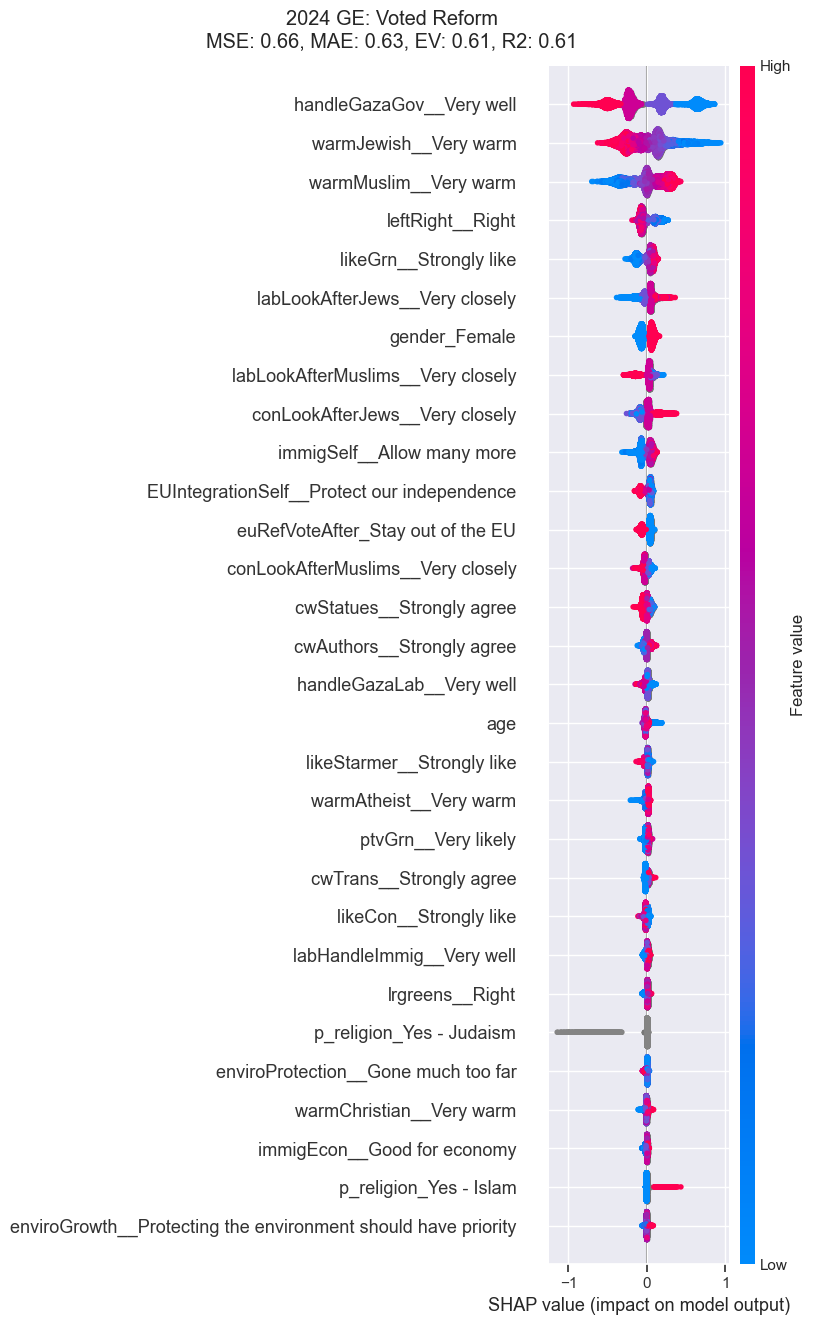

In [37]:
name="israelPalestine__Much more with the Palestinian side"
pattern = "israelPalestine"

df, corr_type = make_corr_summary(BES_reduced_with_na, name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "2024 GE: Voted Reform",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name,pattern],verbosity=0)

In [39]:
# likeYousaf__Strongly like X
# asylumMore__Many more X
# ptvSNP__Very likely X
# likeGrn__Strongly like
# likeSNP__Strongly like X

# handleGazaGov__Very well
# leftRight__Right
# londonMayorVoteFPTP_Susan Hall (Conservative) X
# conLookAfterMuslims__Very closely
# likeFarageFormer__Strongly like	

Top 20 positive (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 likeYousaf__Strongly like 
 0.510000 
 0.00 
 2434 
 
 
 asylumMore__Many more 
 0.480000 
 0.00 
 5707 
 
 
 ptvSNP__Very likely 
 0.480000 
 0.00 
 2466 
 
 
 likeGrn__Strongly like 
 0.480000 
 0.00 
 22446 
 
 
 likeSNP__Strongly like 
 0.480000 
 0.00 
 2497 
 
 
 immigSelf__Allow many more 
 0.480000 
 0.00 
 23236 
 
 
 scotReferendumIntention__Would not vote 
 0.470000 
 0.00 
 2352 
 
 
 approveScotGovt__Strongly approve 
 0.470000 
 0.00 
 2490 
 
 
 immigEcon__Good for economy 
 0.460000 
 0.00 
 23184 
 
 
 familiesMore__Many more 
 0.460000 
 0.00 
 5690 
 
 
 ptvGrn__Very likely 
 0.450000 
 0.00 
 22894 
 
 
 likeSwinney__Strongly like 
 0.440000 
 0.00 
 2302 
 
 
 londonMayorVoteFPTP_Sadiq Khan (Labour) 
 0.440000 
 0.00 
 1749 
 
 
 cwAuthors__Strongly agree 
 0.430000 
 0.00 
 22898 
 
 
 likeDenyer__Strongly like 
 0.420000 
 0.00 
 3805 
 
 
 labHandleImmig__Very well 
 0.410000 
 0.00 
 21632 
 
 
 labLookAfterJews__Very closely 
 0.410000 
 0.00 
 18151 
 
 
 studentsMore__Many more 
 0.390000 
 0.00 
 5720 
 
 
 labHandleEcon__Very well 
 0.380000 
 0.00 
 21886 
 
 
 enviroGrowth__Protecting the environment should[...] 
 0.380000 
 0.00 
 23195 
 
 
 

 
 Top 20 negative (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 handleGazaGov__Very well 
 -0.580000 
 0.00 
 22266 
 
 
 leftRight__Right 
 -0.540000 
 0.00 
 21492 
 
 
 londonMayorVoteFPTP_Susan Hall (Conservative) 
 -0.520000 
 0.00 
 1749 
 
 
 conLookAfterMuslims__Very closely 
 -0.480000 
 0.00 
 18279 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.480000 
 0.00 
 23371 
 
 
 likeFarageFormer__Strongly like 
 -0.480000 
 0.00 
 5913 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.470000 
 0.00 
 21422 
 
 
 likeBrexitParty__Strongly like 
 -0.470000 
 0.00 
 20952 
 
 
 p_past_vote_2019_Conservative 
 -0.450000 
 0.00 
 20584 
 
 
 ptvCon__Very likely 
 -0.440000 
 0.00 
 23285 
 
 
 likeCon__Strongly like 
 -0.440000 
 0.00 
 23787 
 
 
 cwStatues__Strongly agree 
 -0.440000 
 0.00 
 23213 
 
 
 likeTice__Strongly like 
 -0.440000 
 0.00 
 12475 
 
 
 labLookAfterMuslims__Very closely 
 -0.430000 
 0.00 
 17928 
 
 
 ptvBrexitParty__Very likely 
 -0.430000 
 0.00 
 22471 
 
 
 cwTraining__Strongly agree 
 -0.410000 
 0.00 
 22372 
 
 
 pccVote1_The Conservative candidate 
 -0.410000 
 0.00 
 8944 
 
 
 al_scale__Authoritarian 
 -0.400000 
 0.00 
 16058 
 
 
 p_past_vote_2017_Conservative 
 -0.400000 
 0.00 
 19706 
 
 
 enviroProtection__Gone much too far 
 -0.400000 
 0.00 
 22870

MSE: 0.82, MAE: 0.70, EV: 0.52, R2: 0.52


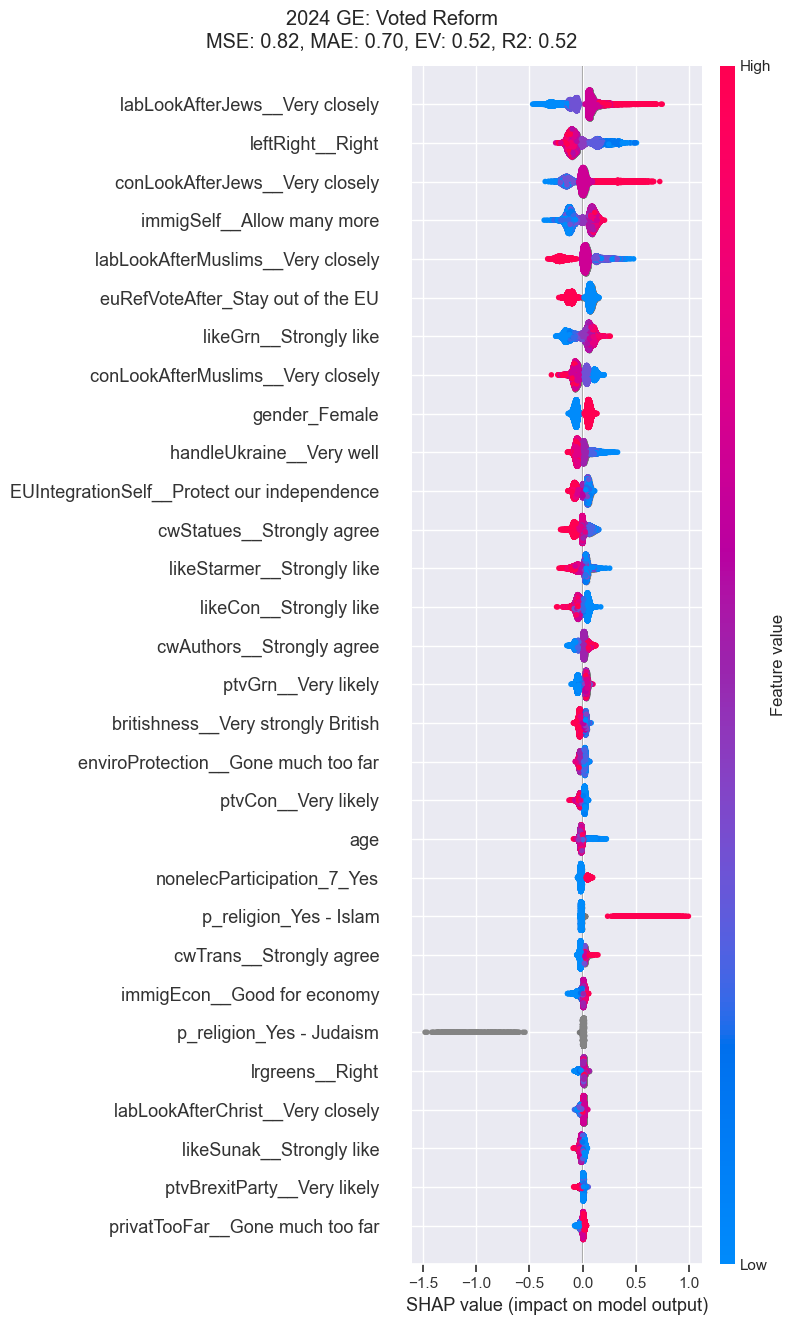

In [40]:
name="israelPalestine__Much more with the Palestinian side"
pattern = "israelPalestine"

df, corr_type = make_corr_summary(BES_reduced_with_na, name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "2024 GE: Voted Reform",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name,pattern,
                                                    "handleGaza","warm",

                                                                                      ],
    
    
    verbosity=0)

In [41]:
BES_Panel["p_ethnicity"].value_counts()

p_ethnicity
White British                 26405
Any other white background     1102
Indian                          462
Prefer not to say               389
Black African                   296
Other ethnic group              273
Pakistani                       180
White and Asian                 153
Chinese                         142
Any other mixed background      131
Black Caribbean                 131
Bangladeshi                     106
Any other Asian background      105
White and Black Caribbean        97
White and Black African          63
Any other black background       29
Name: count, dtype: int64

In [42]:
%%time
dataset_name = "W27_only"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
# BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (712, 13)
CPU times: total: 172 ms
Wall time: 645 ms


<Figure size 640x480 with 0 Axes>

Top 20 positive (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigCultural__Enriches cultural life 
 0.510000 
 0.00 
 22883 
 
 
 immigSelf__Allow many more 
 0.500000 
 0.00 
 22694 
 
 
 likeGrn__Strongly like 
 0.490000 
 0.00 
 22335 
 
 
 immigEcon__Good for economy 
 0.470000 
 0.00 
 22726 
 
 
 discrimBME__A lot of discrimination against 
 0.460000 
 0.00 
 5393 
 
 
 likeSNP__Strongly like 
 0.450000 
 0.00 
 19344 
 
 
 referendumSettled_Yes 
 0.450000 
 0.00 
 2311 
 
 
 cwAuthors__Strongly agree 
 0.450000 
 0.00 
 18008 
 
 
 ptvGrn__Very likely 
 0.450000 
 0.00 
 5715 
 
 
 bestPM_Keir Starmer 
 0.440000 
 0.00 
 3242 
 
 
 likeSwinney__Strongly like 
 0.440000 
 0.00 
 2269 
 
 
 approveScotGovt__Strongly approve 
 0.430000 
 0.00 
 2435 
 
 
 scotReferendumIntention__Would not vote 
 0.430000 
 0.00 
 2219 
 
 
 discrimTrans__A lot of discrimination against 
 0.420000 
 0.00 
 5215 
 
 
 devoPrefWales__Wales should become independent,[...] 
 0.420000 
 0.00 
 1388 
 
 
 likePC__Strongly like 
 0.420000 
 0.00 
 1371 
 
 
 likeDenyer__Strongly like 
 0.410000 
 0.00 
 3887 
 
 
 labHandleImmig__Very well 
 0.400000 
 0.00 
 21528 
 
 
 welfarePreference__Much too low 
 0.390000 
 0.00 
 4620 
 
 
 p_past_vote_2019_Labour 
 0.380000 
 0.00 
 19893 
 
 
 

 
 Top 20 negative (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 handleGazaGov__Very well 
 -0.620000 
 0.00 
 21629 
 
 
 leftRight__Right 
 -0.560000 
 0.00 
 21009 
 
 
 rwandaFlights__Strongly support 
 -0.540000 
 0.00 
 22846 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.500000 
 0.00 
 23050 
 
 
 likeFarage__Strongly like 
 -0.500000 
 0.00 
 8072 
 
 
 blackEquality__Gone much too far 
 -0.500000 
 0.00 
 22239 
 
 
 conLookAfterBA__Very closely 
 -0.490000 
 0.00 
 20668 
 
 
 discrimWhite__A lot of discrimination against 
 -0.480000 
 0.00 
 5401 
 
 
 likeBrexitParty__Strongly like 
 -0.480000 
 0.00 
 21436 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.480000 
 0.00 
 21079 
 
 
 scotRefID_The No side 
 -0.480000 
 0.00 
 2135 
 
 
 p_past_vote_2019_Conservative 
 -0.470000 
 0.00 
 19893 
 
 
 euID_The leave side 
 -0.460000 
 0.00 
 21209 
 
 
 likeCon__Strongly like 
 -0.460000 
 0.00 
 23364 
 
 
 ptvBrexitParty__Very likely 
 -0.450000 
 0.00 
 5682 
 
 
 likeTice__Strongly like 
 -0.450000 
 0.00 
 13535 
 
 
 cwStatues__Strongly agree 
 -0.450000 
 0.00 
 18256 
 
 
 ptvCon__Very likely 
 -0.440000 
 0.00 
 5788 
 
 
 cwTraining__Strongly agree 
 -0.430000 
 0.00 
 17651 
 
 
 effectsEUEconRetro__Much better 
 -0.430000 
 0.00 
 22797

MSE: 0.76, MAE: 0.67, EV: 0.55, R2: 0.55


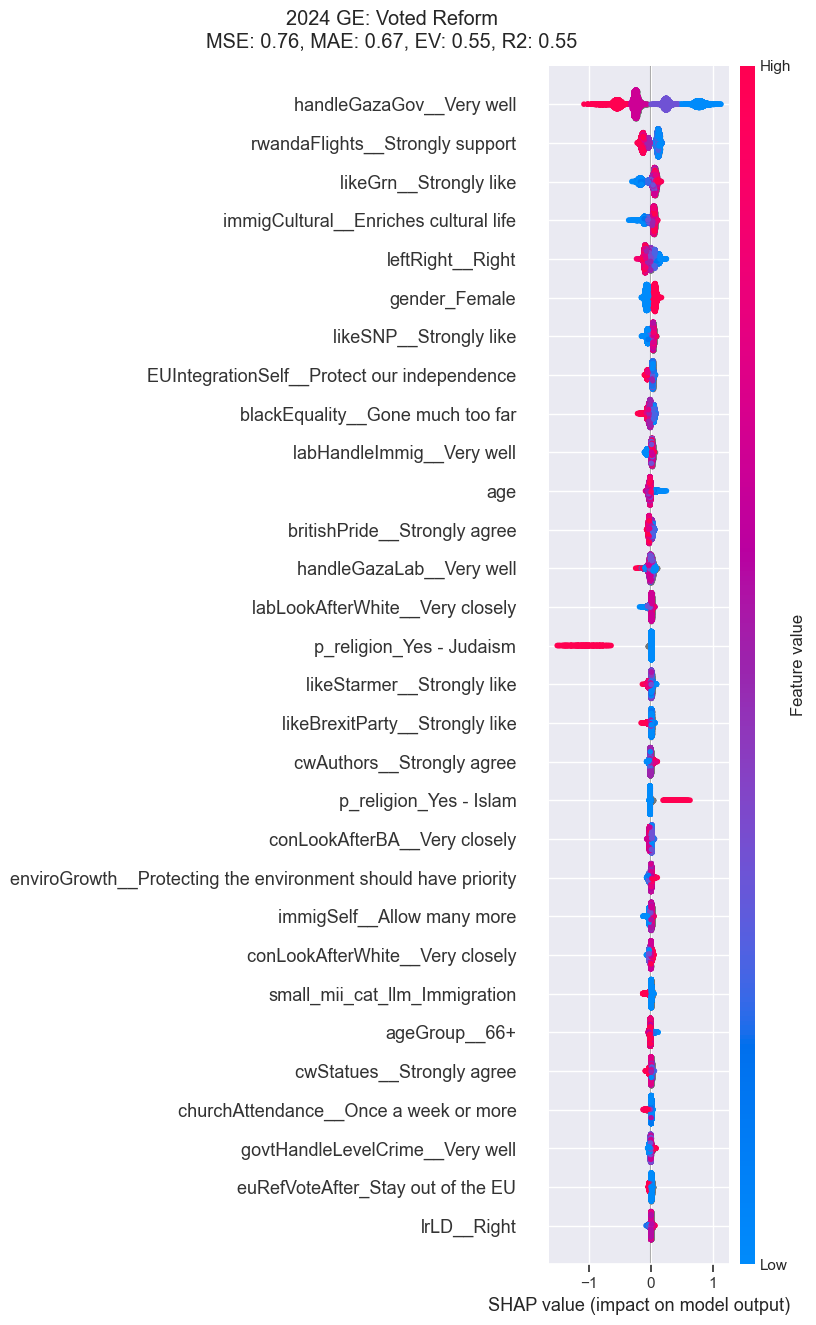

In [43]:
name="israelPalestine__Much more with the Palestinian side"
pattern = "israelPalestine"

df, corr_type = make_corr_summary(BES_reduced_with_na, name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "2024 GE: Voted Reform",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name,pattern,
#                                                     "handleGaza","warm",
                                                                                      ],
    
    
    verbosity=0)

In [44]:
# BES_Panel["p_religion"].value_counts()

In [45]:
# rwandaFlights

Top 20 positive (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigCultural__Enriches cultural life 
 0.510000 
 0.00 
 22883 
 
 
 immigSelf__Allow many more 
 0.500000 
 0.00 
 22694 
 
 
 likeGrn__Strongly like 
 0.490000 
 0.00 
 22335 
 
 
 immigEcon__Good for economy 
 0.470000 
 0.00 
 22726 
 
 
 discrimBME__A lot of discrimination against 
 0.460000 
 0.00 
 5393 
 
 
 likeSNP__Strongly like 
 0.450000 
 0.00 
 19344 
 
 
 referendumSettled_Yes 
 0.450000 
 0.00 
 2311 
 
 
 cwAuthors__Strongly agree 
 0.450000 
 0.00 
 18008 
 
 
 ptvGrn__Very likely 
 0.450000 
 0.00 
 5715 
 
 
 bestPM_Keir Starmer 
 0.440000 
 0.00 
 3242 
 
 
 likeSwinney__Strongly like 
 0.440000 
 0.00 
 2269 
 
 
 approveScotGovt__Strongly approve 
 0.430000 
 0.00 
 2435 
 
 
 scotReferendumIntention__Would not vote 
 0.430000 
 0.00 
 2219 
 
 
 discrimTrans__A lot of discrimination against 
 0.420000 
 0.00 
 5215 
 
 
 devoPrefWales__Wales should become independent,[...] 
 0.420000 
 0.00 
 1388 
 
 
 likePC__Strongly like 
 0.420000 
 0.00 
 1371 
 
 
 likeDenyer__Strongly like 
 0.410000 
 0.00 
 3887 
 
 
 labHandleImmig__Very well 
 0.400000 
 0.00 
 21528 
 
 
 welfarePreference__Much too low 
 0.390000 
 0.00 
 4620 
 
 
 p_past_vote_2019_Labour 
 0.380000 
 0.00 
 19893 
 
 
 

 
 Top 20 negative (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 handleGazaGov__Very well 
 -0.620000 
 0.00 
 21629 
 
 
 leftRight__Right 
 -0.560000 
 0.00 
 21009 
 
 
 rwandaFlights__Strongly support 
 -0.540000 
 0.00 
 22846 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.500000 
 0.00 
 23050 
 
 
 likeFarage__Strongly like 
 -0.500000 
 0.00 
 8072 
 
 
 blackEquality__Gone much too far 
 -0.500000 
 0.00 
 22239 
 
 
 conLookAfterBA__Very closely 
 -0.490000 
 0.00 
 20668 
 
 
 discrimWhite__A lot of discrimination against 
 -0.480000 
 0.00 
 5401 
 
 
 likeBrexitParty__Strongly like 
 -0.480000 
 0.00 
 21436 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.480000 
 0.00 
 21079 
 
 
 scotRefID_The No side 
 -0.480000 
 0.00 
 2135 
 
 
 p_past_vote_2019_Conservative 
 -0.470000 
 0.00 
 19893 
 
 
 euID_The leave side 
 -0.460000 
 0.00 
 21209 
 
 
 likeCon__Strongly like 
 -0.460000 
 0.00 
 23364 
 
 
 ptvBrexitParty__Very likely 
 -0.450000 
 0.00 
 5682 
 
 
 likeTice__Strongly like 
 -0.450000 
 0.00 
 13535 
 
 
 cwStatues__Strongly agree 
 -0.450000 
 0.00 
 18256 
 
 
 ptvCon__Very likely 
 -0.440000 
 0.00 
 5788 
 
 
 cwTraining__Strongly agree 
 -0.430000 
 0.00 
 17651 
 
 
 effectsEUEconRetro__Much better 
 -0.430000 
 0.00 
 22797

MSE: 0.88, MAE: 0.73, EV: 0.47, R2: 0.47


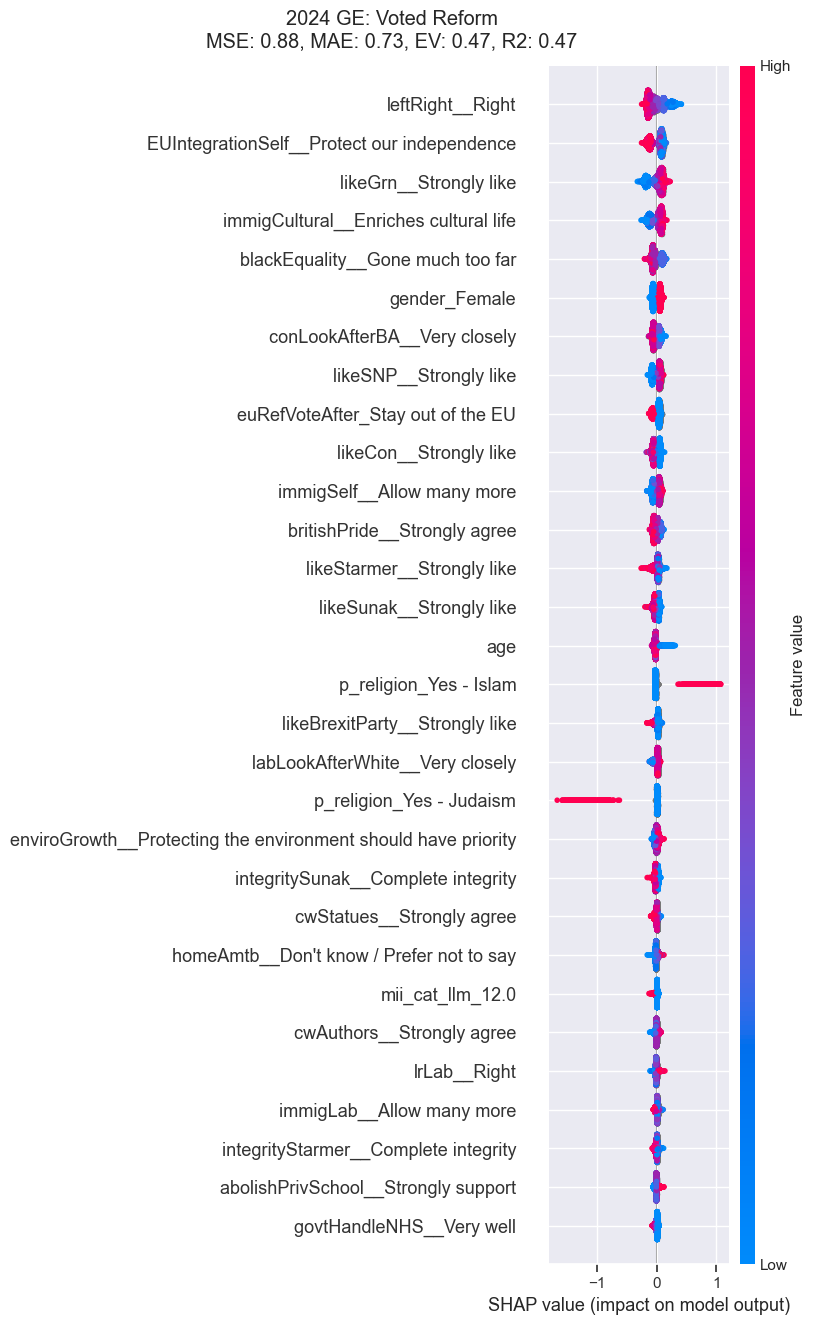

In [46]:
name="israelPalestine__Much more with the Palestinian side"
pattern = "israelPalestine"

df, corr_type = make_corr_summary(BES_reduced_with_na, name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "2024 GE: Voted Reform",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name,pattern,
                                                    "handleGaza","warm","rwandaFlights",
                                                                                      ],
    
    
    verbosity=0)

Top 20 positive (spearman) correlations for rwandaFlights__Strongly support 
 
 
   
 r 
 p 
 N 
 
 
 
 
 likeFarage__Strongly like 
 0.680000 
 0.00 
 9507 
 
 
 leftRight__Right 
 0.660000 
 0.00 
 23596 
 
 
 likeBrexitParty__Strongly like 
 0.660000 
 0.00 
 24708 
 
 
 EUIntegrationSelf__Protect our independence 
 0.630000 
 0.00 
 27224 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.620000 
 0.00 
 24809 
 
 
 overseasAid__Strongly agree 
 0.620000 
 0.00 
 7009 
 
 
 p_past_vote_2019_Conservative 
 0.610000 
 0.00 
 23324 
 
 
 euID_The leave side 
 0.600000 
 0.00 
 24814 
 
 
 blackEquality__Gone much too far 
 0.600000 
 0.00 
 26208 
 
 
 ptvBrexitParty__Very likely 
 0.590000 
 0.00 
 6654 
 
 
 conLookAfterBA__Very closely 
 0.590000 
 0.00 
 23743 
 
 
 likeTice__Strongly like 
 0.580000 
 0.00 
 14926 
 
 
 handleEUPost__Very well 
 0.550000 
 0.00 
 7055 
 
 
 likeCon__Strongly like 
 0.550000 
 0.00 
 27694 
 
 
 p_eurefvote_I voted to leave 
 0.540000 
 0.00 
 23702 
 
 
 euLeaveVoiceRetro__Much better 
 0.530000 
 0.00 
 26789 
 
 
 p_past_vote_2017_Conservative 
 0.530000 
 0.00 
 22232 
 
 
 ptvCon__Very likely 
 0.530000 
 0.00 
 6817 
 
 
 effectsEUEconRetro__Much better 
 0.530000 
 0.00 
 27037 
 
 
 effectsEUTradeRetro__Much better 
 0.530000 
 0.00 
 25503 
 
 
 

 
 Top 20 negative (spearman) correlations for rwandaFlights__Strongly support 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigSelf__Allow many more 
 -0.710000 
 0.00 
 26795 
 
 
 immigCultural__Enriches cultural life 
 -0.680000 
 0.00 
 27125 
 
 
 bestPM_Keir Starmer 
 -0.670000 
 0.00 
 3766 
 
 
 immigEcon__Good for economy 
 -0.660000 
 0.00 
 27047 
 
 
 labHandleImmig__Very well 
 -0.570000 
 0.00 
 25316 
 
 
 israelPalestine__Much more with the Palestinian[...] 
 -0.540000 
 0.00 
 22846 
 
 
 changeEconomyLab__Getting a lot better 
 -0.530000 
 0.00 
 24820 
 
 
 labHandleEcon__Very well 
 -0.520000 
 0.00 
 25511 
 
 
 ptvLab__Very likely 
 -0.520000 
 0.00 
 6806 
 
 
 welfarePreference__Much too low 
 -0.510000 
 0.00 
 5450 
 
 
 likeGrn__Strongly like 
 -0.510000 
 0.00 
 25945 
 
 
 discrimBME__A lot of discrimination against 
 -0.500000 
 0.00 
 6258 
 
 
 ptvGrn__Very likely 
 -0.490000 
 0.00 
 6693 
 
 
 achieveIncGrowthLab_Yes 
 -0.490000 
 0.00 
 4965 
 
 
 changeEducationLab__Getting a lot better 
 -0.480000 
 0.00 
 24014 
 
 
 likeLab__Strongly like 
 -0.480000 
 0.00 
 27643 
 
 
 likeSNP__Strongly like 
 -0.480000 
 0.00 
 22319 
 
 
 approveWelshGovt__Strongly approve 
 -0.480000 
 0.00 
 1696 
 
 
 discrimTrans__A lot of discrimination against 
 -0.470000 
 0.00 
 6076 
 
 
 achieveReduceNHSLab_Yes 
 -0.470000 
 0.00 
 5383

MSE: 0.71, MAE: 0.61, EV: 0.72, R2: 0.72


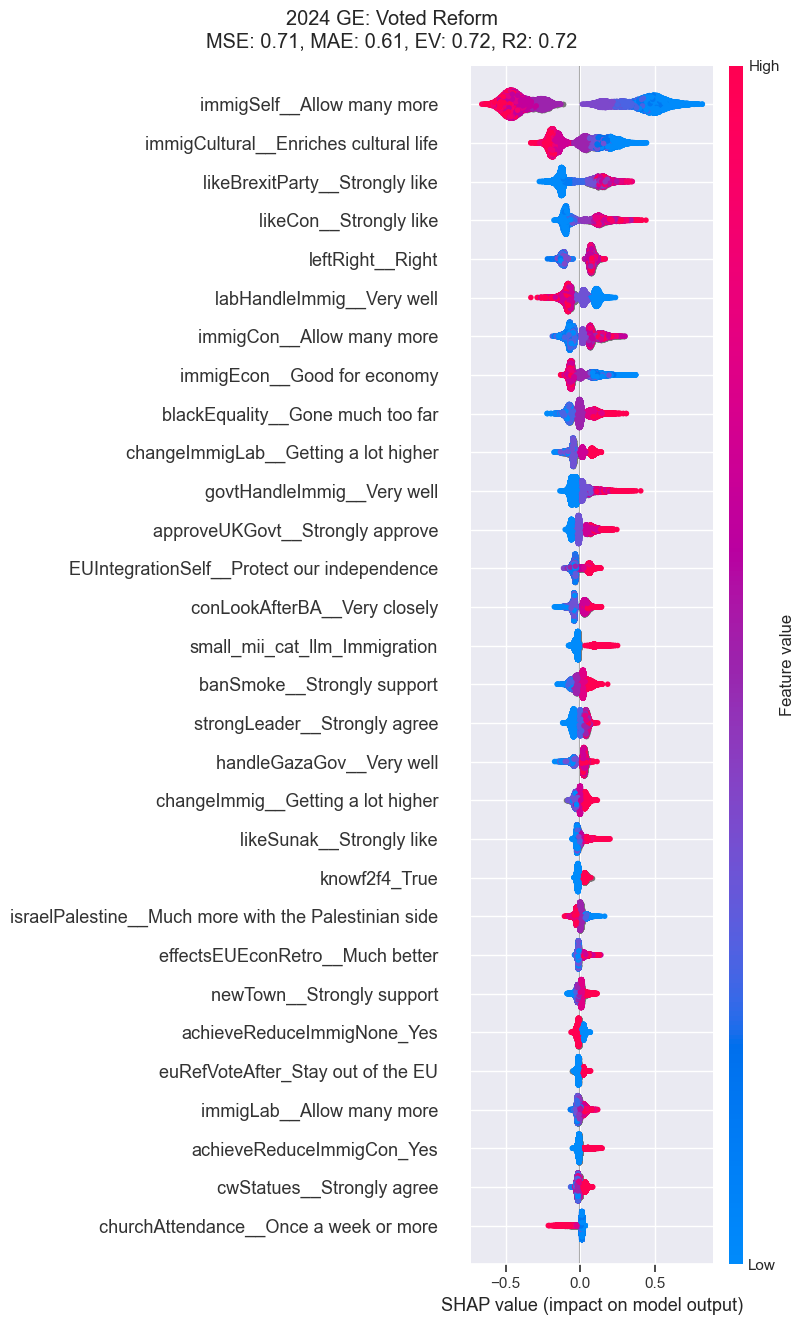

In [47]:
name="rwandaFlights__Strongly support"
pattern = "rwandaFlights__Strongly support"

df, corr_type = make_corr_summary(BES_reduced_with_na, name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "2024 GE: Voted Reform",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name,pattern,
#                                                     "handleGaza","warm","rwandaFlights",
                                                                                      ],
    
    
    verbosity=0)

In [48]:
search(BES_reduced_with_na,"rwandaFlights")
# banSmoke and newTown???
# interesting effect from churchAttendance!

rwandaFlights__Strongly support    28453
dtype: int64

In [49]:
%%time
dataset_name = "W28_only"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
# BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (576, 13)
CPU times: total: 266 ms
Wall time: 689 ms


<Figure size 640x480 with 0 Axes>

Top 20 positive (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 likeGrn__Strongly like 
 0.520000 
 0.00 
 6119 
 
 
 immigSelf__Allow many more 
 0.500000 
 0.00 
 6176 
 
 
 likeDenyer__Strongly like 
 0.500000 
 0.00 
 1493 
 
 
 votesAt16__Strongly support 
 0.480000 
 0.00 
 6260 
 
 
 likeSwinney__Strongly like 
 0.470000 
 0.00 
 660 
 
 
 likeSNP__Strongly like 
 0.460000 
 0.00 
 5288 
 
 
 preferConMajority__Ranked fifth 
 0.460000 
 0.00 
 5828 
 
 
 preferConCoalition__Ranked fifth 
 0.430000 
 0.00 
 5828 
 
 
 likeRamsay__Strongly like 
 0.390000 
 0.00 
 1144 
 
 
 paperLast3_10_Yes 
 0.380000 
 0.00 
 2958 
 
 
 breakfastClub__Strongly support 
 0.380000 
 0.00 
 6133 
 
 
 taxSpendSelf__Government should increase taxes a[...] 
 0.380000 
 0.00 
 6055 
 
 
 lrLab__Right 
 0.370000 
 0.00 
 5744 
 
 
 lrStarmer__Right 
 0.370000 
 0.00 
 5709 
 
 
 likeLab__Strongly like 
 0.360000 
 0.00 
 6292 
 
 
 p_past_vote_2019_Labour 
 0.360000 
 0.00 
 5651 
 
 
 lrSunak__Right 
 0.350000 
 0.00 
 5729 
 
 
 lrCon__Right 
 0.350000 
 0.00 
 5747 
 
 
 p_past_vote_2017_Labour 
 0.340000 
 0.00 
 5474 
 
 
 likeDavey__Strongly like 
 0.340000 
 0.00 
 5491 
 
 
 

 
 Top 20 negative (spearman) correlations for israelPalestine__Much more with the Palestinian side 
 
 
   
 r 
 p 
 N 
 
 
 
 
 leftRight__Right 
 -0.560000 
 0.00 
 5771 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.490000 
 0.00 
 6223 
 
 
 likeBrexitParty__Strongly like 
 -0.490000 
 0.00 
 6152 
 
 
 likeFarage__Strongly like 
 -0.470000 
 0.00 
 6276 
 
 
 p_past_vote_2019_Conservative 
 -0.460000 
 0.00 
 5651 
 
 
 likeCon__Strongly like 
 -0.440000 
 0.00 
 6301 
 
 
 privVAT__Strongly agree 
 -0.420000 
 0.00 
 6092 
 
 
 preferLabMajority__Ranked fifth 
 -0.410000 
 0.00 
 5828 
 
 
 p_past_vote_2017_Conservative 
 -0.410000 
 0.00 
 5474 
 
 
 immigLab__Allow many more 
 -0.410000 
 0.00 
 5671 
 
 
 preferLabCoalition__Ranked fifth 
 -0.410000 
 0.00 
 5828 
 
 
 militaryService__Strongly support 
 -0.390000 
 0.00 
 6238 
 
 
 small_mii_cat_llm_Immigration 
 -0.380000 
 0.00 
 5780 
 
 
 selfPriorities_immig_Yes 
 -0.380000 
 0.00 
 6347 
 
 
 conLookAfterYoung__Very closely 
 -0.370000 
 0.00 
 5952 
 
 
 p_eurefvote_I voted to leave 
 -0.370000 
 0.00 
 5756 
 
 
 immigLD__Allow many more 
 -0.370000 
 0.00 
 4922 
 
 
 generalElectionVoteUnsqueeze_Brexit Party/Reform[...] 
 -0.370000 
 0.00 
 3436 
 
 
 likeSunak__Strongly like 
 -0.360000 
 0.00 
 6309 
 
 
 conLookAfterWC__Very closely 
 -0.360000 
 0.00 
 6072

MSE: 1.05, MAE: 0.81, EV: 0.41, R2: 0.41


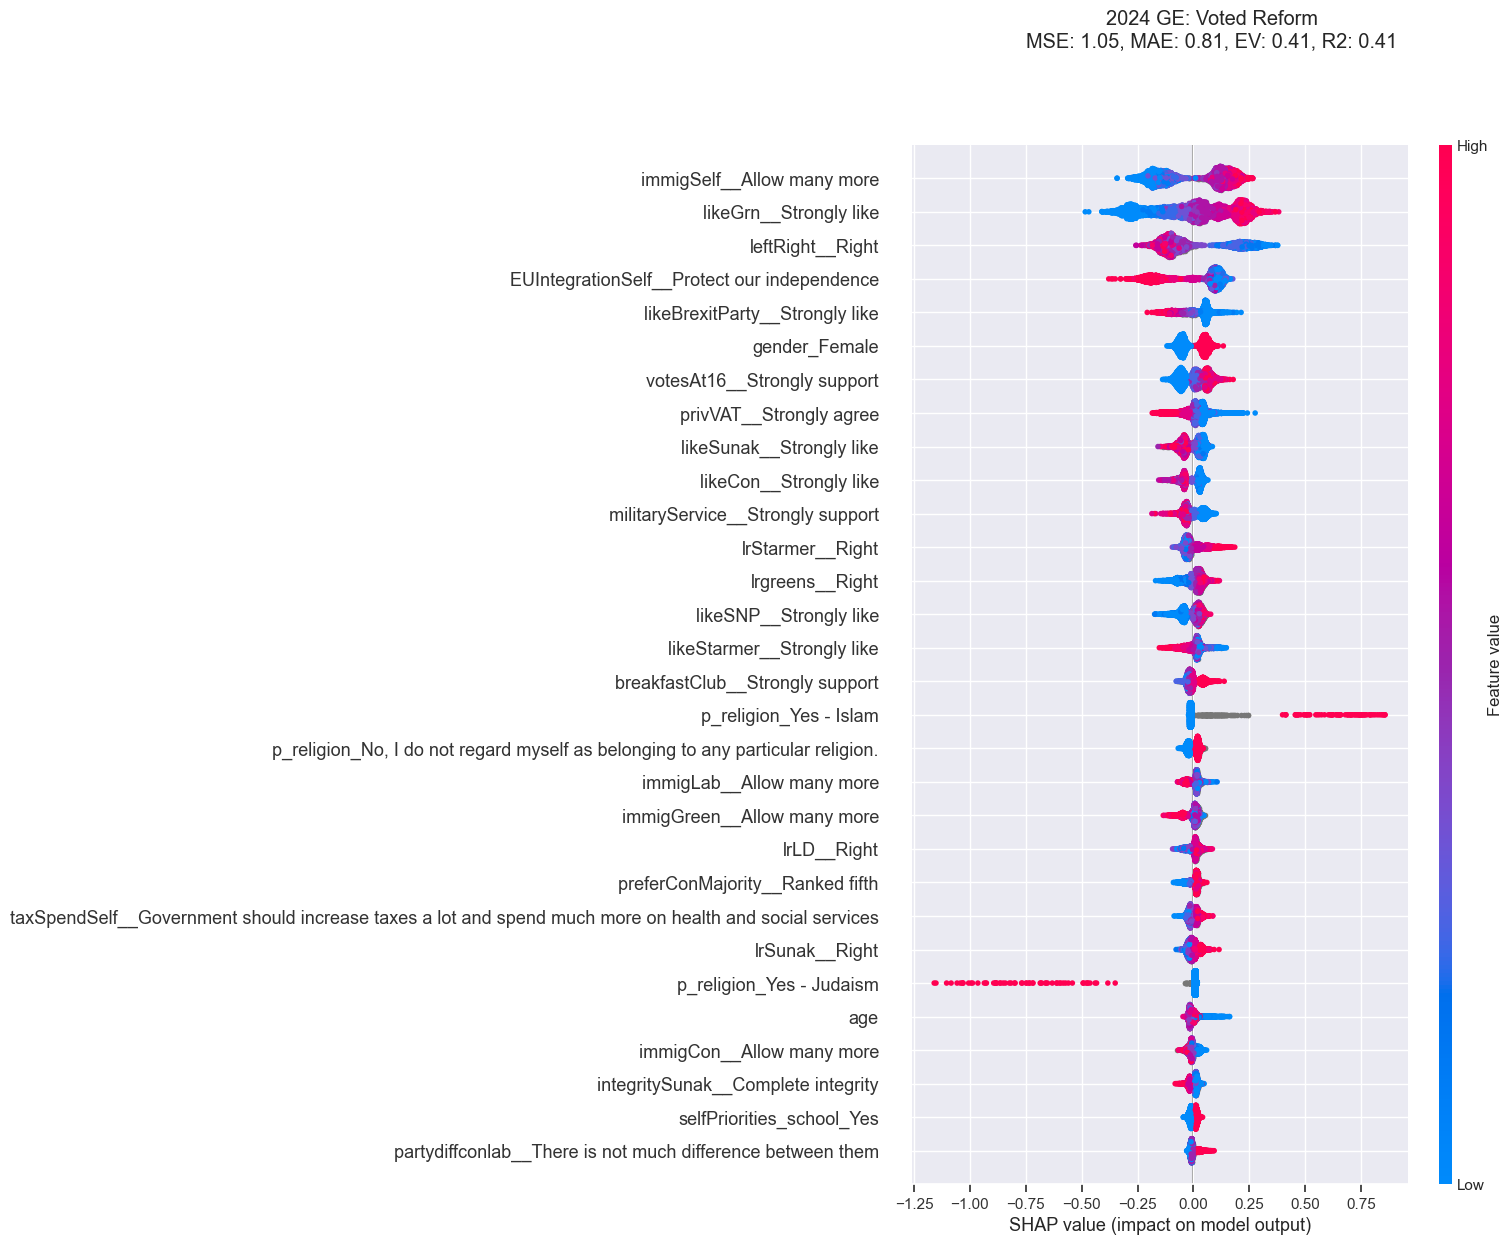

In [50]:
name="israelPalestine__Much more with the Palestinian side"
pattern = "israelPalestine"

df, corr_type = make_corr_summary(BES_reduced_with_na, name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "2024 GE: Voted Reform",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name,pattern,
#                                                     "handleGaza","warm",
                                                                                      ],
    
    
    verbosity=0)

Top 20 positive (spearman) correlations for gender_Female 
 
 
   
 r 
 p 
 N 
 
 
 
 
 hungParliamentResponse__Very likely 
 0.210000 
 0.00 
 26546 
 
 
 majorityPartyCon__Very likely 
 0.180000 
 0.00 
 28709 
 
 
 likeGrn__Strongly like 
 0.150000 
 0.00 
 29238 
 
 
 lrgreens__Right 
 0.140000 
 0.00 
 22283 
 
 
 winConstituencyGreen__100 - Very likely to win 
 0.140000 
 0.00 
 30489 
 
 
 EUIntegrationGreen__Protect our independence 
 0.130000 
 0.00 
 20322 
 
 
 fbUse_Yes 
 0.130000 
 0.00 
 31495 
 
 
 conPartnerLD_Would join Conservatives 
 0.130000 
 0.00 
 23435 
 
 
 socMedia_2_Yes 
 0.120000 
 0.00 
 31391 
 
 
 p_work_stat_Working part time (8-29 hours a week) 
 0.120000 
 0.00 
 30863 
 
 
 likeRamsay__Strongly like 
 0.120000 
 0.00 
 5305 
 
 
 EUIntegrationLD__Protect our independence 
 0.120000 
 0.00 
 23421 
 
 
 selfPriorities_nhs_Yes 
 0.120000 
 0.00 
 31088 
 
 
 winConstituencyInd__100 - Very likely to win 
 0.120000 
 0.00 
 29822 
 
 
 decidedVote_No, not decided yet 
 0.120000 
 0.00 
 23708 
 
 
 lrSunak__Right 
 0.120000 
 0.00 
 25951 
 
 
 israelPalestine__Much more with the Palestinian[...] 
 0.120000 
 0.00 
 6381 
 
 
 socMediaInfo_Youtube_111_Yes 
 0.120000 
 0.00 
 15234 
 
 
 small_mii_cat_llm_Health 
 0.120000 
 0.00 
 27953 
 
 
 p_education_Clerical and commercial 
 0.110000 
 0.00 
 30863 
 
 
 

 
 Top 20 negative (spearman) correlations for gender_Female 
 
 
   
 r 
 p 
 N 
 
 
 
 
 polAttention__Pay a great deal of attention 
 -0.190000 
 0.00 
 31101 
 
 
 socMedia_1_Yes 
 -0.180000 
 0.00 
 31391 
 
 
 noChanceCoalitionCon_Yes 
 -0.160000 
 0.00 
 28999 
 
 
 noChanceCoalitionPC_Yes 
 -0.160000 
 0.00 
 28999 
 
 
 immigGreen__Allow many more 
 -0.150000 
 0.00 
 19333 
 
 
 noChanceCoalitionSNP_Yes 
 -0.140000 
 0.00 
 28999 
 
 
 majorityPartyLab__Very likely 
 -0.140000 
 0.00 
 28710 
 
 
 noChanceCoalitionBrexit_Yes 
 -0.130000 
 0.00 
 28999 
 
 
 infoSourceInternet__More than 2 hours 
 -0.130000 
 0.00 
 30930 
 
 
 noChanceCoalitionLD_Yes 
 -0.130000 
 0.00 
 28999 
 
 
 immigLD__Allow many more 
 -0.130000 
 0.00 
 22099 
 
 
 p_gross_household__£150,000 and over 
 -0.130000 
 0.00 
 23453 
 
 
 p_job_sector_Private sector profit-seeking (e.g.[...] 
 -0.130000 
 0.00 
 30587 
 
 
 p_sexuality_Gay or lesbian 
 -0.120000 
 0.00 
 30130 
 
 
 conLookAfterRetired__Very closely 
 -0.120000 
 0.00 
 28622 
 
 
 p_gross_personal__Â Prefer not to answer 
 -0.110000 
 0.00 
 31543 
 
 
 noChanceCoalitionDUP_Yes 
 -0.110000 
 0.00 
 28999 
 
 
 socMediaInfo_Youtube_3_Yes 
 -0.110000 
 0.00 
 15234 
 
 
 achieveReduceCarbLD_Yes 
 -0.110000 
 0.00 
 5892 
 
 
 noChanceCoalitionGrn_Yes 
 -0.110000 
 0.00 
 28999

MSE: 0.15, MAE: 0.32, EV: 0.42, R2: 0.42


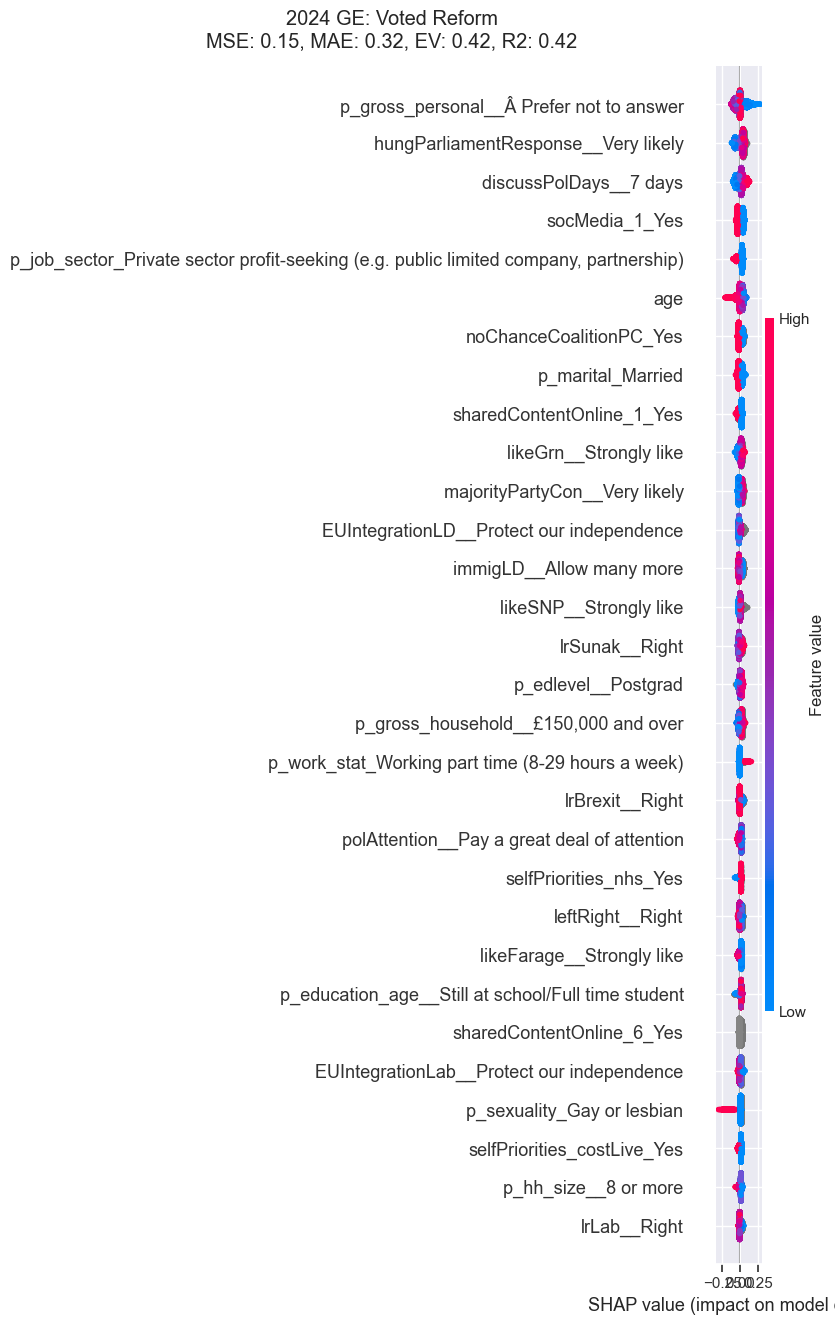

In [51]:
name="gender_Female"
pattern = "gender_Female"

df, corr_type = make_corr_summary(BES_reduced_with_na, name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "2024 GE: Voted Reform",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name,pattern,
#                                                     "handleGaza","warm",
                                                                                      ],
    
    
    verbosity=0)

In [52]:
## wow - some big social media correlates!

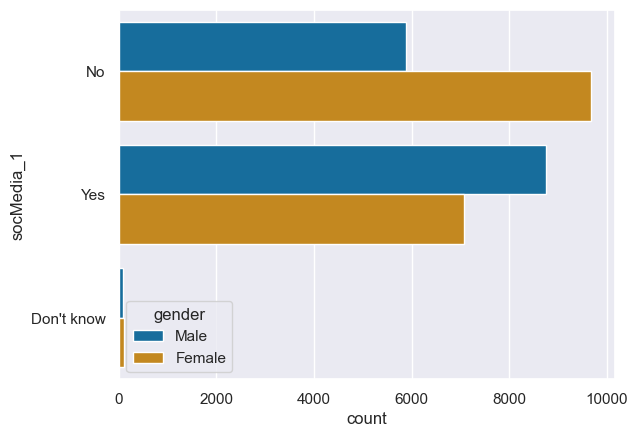

In [53]:
sns.countplot(y=BES_Panel["socMedia_1"],hue=BES_Panel["gender"]);

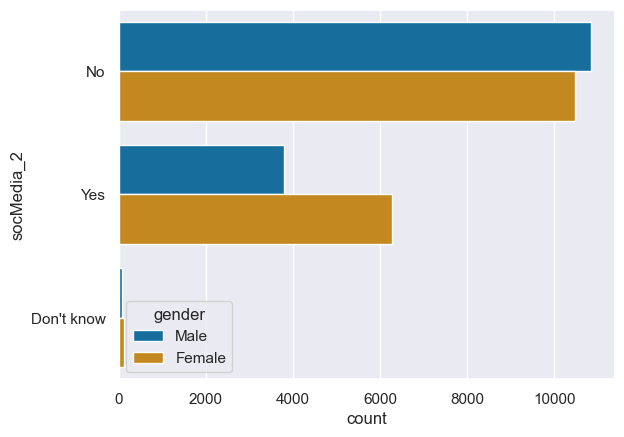

In [54]:
sns.countplot(y=BES_Panel["socMedia_2"],hue=BES_Panel["gender"]);

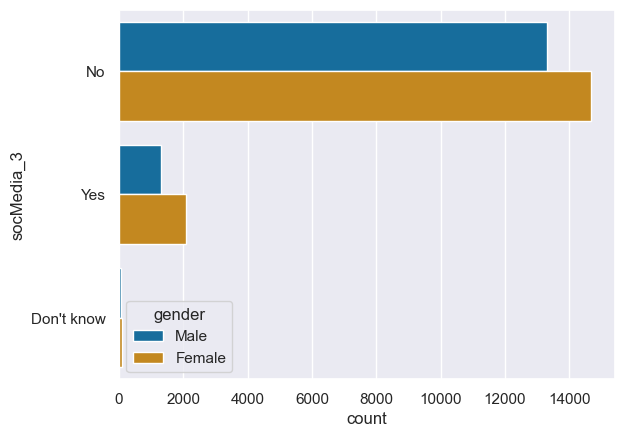

In [55]:
sns.countplot(y=BES_Panel["socMedia_3"],hue=BES_Panel["gender"]);

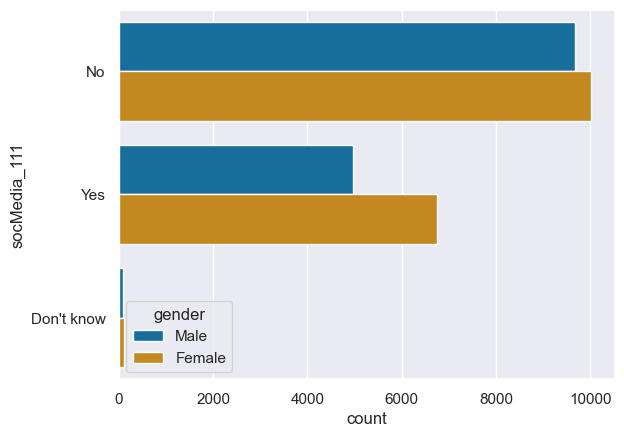

In [56]:
sns.countplot(y=BES_Panel["socMedia_111"],hue=BES_Panel["gender"]);

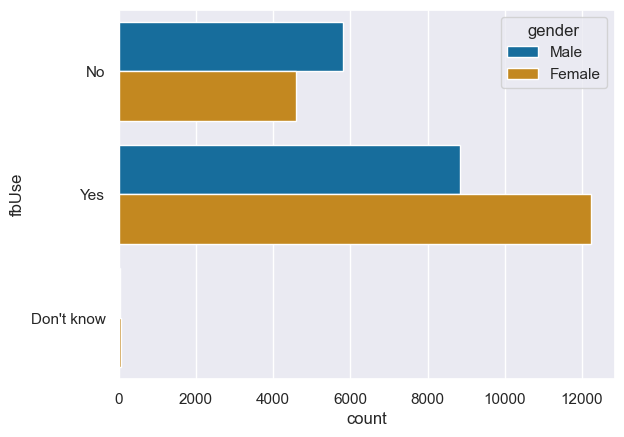

In [57]:
sns.countplot(y=BES_Panel["fbUse"],hue=BES_Panel["gender"]);

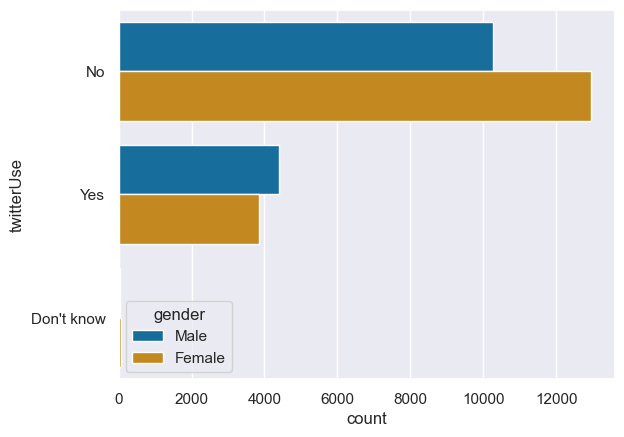

In [58]:
sns.countplot(y=BES_Panel["twitterUse"],hue=BES_Panel["gender"]);

In [59]:
BES_Panel["gender"].value_counts()

gender
Female    16871
Male      14711
Name: count, dtype: int64

In [60]:
%%time
dataset_name = "W12_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
# BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (423, 13)
CPU times: total: 31.2 ms
Wall time: 309 ms


<Figure size 640x480 with 0 Axes>

In [61]:
search(BES_Panel,"lrCorbyn")

lrCorbyn    34394
dtype: int64

In [62]:
weighted_value_counts(BES_Panel["lrCorbyn"],BES_Panel["wt"],normalize=True,perc=True)

weighted_sample_percentage  raw_sample_size
lrCorbyn                                               
9                                 0.55            178.0
8                                 1.02            336.0
7                                 1.12            336.0
6                                 1.15            303.0
Right                             1.32            427.0
5                                 3.07            855.0
4                                 3.29           1116.0
3                                 7.04           2565.0
1                                12.05           5003.0
2                                12.59           4936.0
Don't know                       27.84           6588.0
Left                             28.96          11751.0

In [63]:
%%time
dataset_name = "W29_only"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
# BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (474, 13)
CPU times: total: 156 ms
Wall time: 553 ms


In [64]:
search(BES_Panel,"al_scale|lr_scale|turnout")

genElecTurnoutRetro    31098
attemptTurnout          4018
lr_scaleW27            21532
al_scaleW27            20734
p_turnout_2015         27110
p_turnout_2017         30549
p_turnout_2019         31088
p_turnout_2010         21744
p_turnout_2005         20609
p_turnout_scot_ref     10504
p_eurefturnout         31088
dtype: int64

In [65]:
# BES_Panel["turnoutUKGeneral"].value_counts() # W28

In [66]:
al_scale = BES_Panel["al_scaleW27"].cat.codes.replace(-1,np.nan)
al_scale.name='al_scale'
lr_scale = BES_Panel["lr_scaleW27"].cat.codes.replace(-1,np.nan)
lr_scale.name='lr_scale'


In [67]:
al_scale_flat = pd.qcut(BES_Panel["al_scaleW27"].cat.codes.replace(-1,np.nan),q=9)
al_scale_flat.name='al_scale_flat'
lr_scale_flat = pd.qcut(BES_Panel["lr_scaleW27"].cat.codes.replace(-1,np.nan),q=9)
lr_scale_flat.name='lr_scale_flat'


In [68]:
# turnout = BES_Panel["p_turnout_2019"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

In [69]:
BES_Panel["genElecTurnoutRetro"]

id
14              Yes, voted
18              Yes, voted
24              Yes, voted
30              Yes, voted
31        No, did not vote
                ...       
120138          Yes, voted
120139          Yes, voted
120140          Yes, voted
120141          Yes, voted
120142          Yes, voted
Name: genElecTurnoutRetro, Length: 31098, dtype: category
Categories (3, object): ['No, did not vote' < 'Yes, voted' < 'Don't know']

In [70]:
turnout = BES_Panel["genElecTurnoutRetro"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

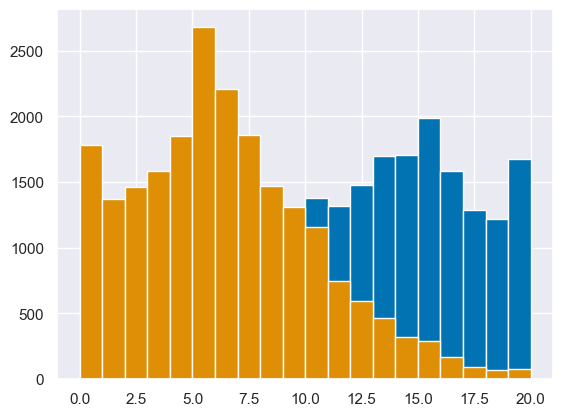

In [71]:
al_scale.hist(bins=20);
lr_scale.hist(bins=20);

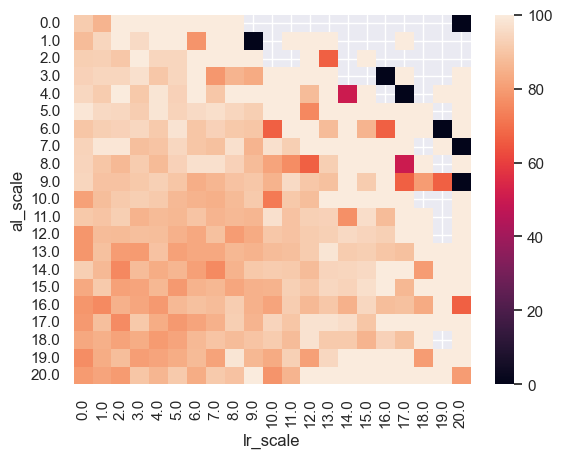

In [72]:
hm = (pd.crosstab(al_scale,lr_scale,turnout,aggfunc=np.mean)*100);
sns.heatmap(hm);
plt.xlabel("lr_scale");
plt.ylabel("al_scale");

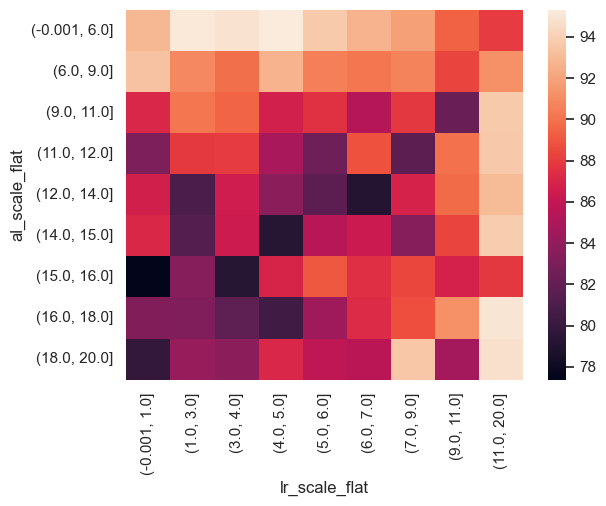

In [73]:
hm = (pd.crosstab(al_scale_flat,lr_scale_flat,turnout,aggfunc=np.mean)*100);
sns.heatmap(hm);
plt.xlabel("lr_scale_flat");
plt.ylabel("al_scale_flat");

In [74]:
(pd.crosstab(al_scale_flat,lr_scale_flat,turnout,aggfunc=sum))

# alright-ish coverage

lr_scale_flat  (-0.001, 1.0]  (1.0, 3.0]  (3.0, 4.0]  (4.0, 5.0]  (5.0, 6.0]  \
al_scale_flat                                                                  
(-0.001, 6.0]          780.0       507.0       256.0       284.0       179.0   
(6.0, 9.0]             393.0       388.0       248.0       355.0       257.0   
(9.0, 11.0]            223.0       266.0       170.0       275.0       226.0   
(11.0, 12.0]           108.0       138.0        73.0       129.0       136.0   
(12.0, 14.0]           208.0       254.0       193.0       335.0       299.0   
(14.0, 15.0]           122.0       131.0        95.0       233.0       171.0   
(15.0, 16.0]           130.0       171.0       103.0       146.0       146.0   
(16.0, 18.0]           238.0       286.0       170.0       185.0       201.0   
(18.0, 20.0]           281.0       212.0       118.0       121.0       109.0   

lr_scale_flat  (6.0, 7.0]  (7.0, 9.0]  (9.0, 11.0]  (11.0, 20.0]  
al_scale_flat                                                     
(-0.001, 6.0]       127.0       112.0         42.0          88.0  
(6.0, 9.0]          201.0       242.0        136.0         176.0  
(9.0, 11.0]         198.0       296.0        320.0         223.0  
(11.0, 12.0]        127.0       196.0        152.0         133.0  
(12.0, 14.0]        265.0       450.0        305.0         385.0  
(14.0, 15.0]        158.0       257.0        189.0         211.0  
(15.0, 16.0]        112.0       183.0        112.0         152.0  
(16.0, 18.0]        178.0       305.0        176.0         266.0  
(18.0, 20.0]         95.0       160.0         94.0         145.0

In [75]:
for q in [2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20]:
    print(q)

    al_gap = (pd.qcut(al_scale,q=q,duplicates='drop').value_counts().max())/(pd.qcut(al_scale,q=q,duplicates='drop').value_counts().min()) 
    lr_gap = (pd.qcut(lr_scale,q=q,duplicates='drop').value_counts().max())/(pd.qcut(lr_scale,q=q,duplicates='drop').value_counts().min()) 
    
    print(al_gap+lr_gap)

2
2.6989009018287176
3
2.603619347140042
4
3.4295402226487246
5
4.56790386145392
6
4.160749855191456
7
3.790075490781195
8
5.221238185351361
9
4.002273690672825
10
4.9799387373249635
11
5.159475361003709
12
5.007854512390518
13
6.608555194805195
14
5.345351731601731
15
6.138680278884462
17
6.7337987886944815
18
6.7337987886944815
19
7.2425487886944815
20
6.7337987886944815


In [76]:
%%time
dataset_name = "W29_only"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
# BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (474, 13)
CPU times: total: 125 ms
Wall time: 358 ms


<Figure size 640x480 with 0 Axes>

In [77]:
BES_Panel["p_past_vote_2024"] = BES_Panel["generalElectionVote"].copy().astype('object')
BES_Panel.loc[BES_Panel["genElecTurnoutRetro"]=="No, did not vote","p_past_vote_2024"]="Did Not Vote"
BES_Panel["p_past_vote_2024"].value_counts(dropna=False)

p_past_vote_2024
Labour                           9506
Conservative                     5646
Brexit Party/Reform UK           4051
Did Not Vote                     4018
Liberal Democrat                 3614
Green Party                      1985
Scottish National Party (SNP)     714
Other                             483
An independent candidate          414
Don't know                        342
Plaid Cymru                       242
NaN                                83
Name: count, dtype: int64

In [78]:
### look for Changes Over Time in a subset of variables

In [79]:
fn = "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W29_comb\\BES2024_W29_Panel_v29A.0.dta"

# pd.read_stata(fn)


with pd.io.stata.StataReader(fn) as reader:
    var_lab = reader.variable_labels()
    print( var_lab )  

{'id': 'ID', 'waves_taken': 'Number of waves taken by a respondent', 'wave1': 'Respondent took wave 1', 'wave2': 'Respondent took wave 2', 'wave3': 'Respondent took wave 3', 'wave4': 'Respondent took wave 4', 'wave5': 'Respondent took wave 5', 'wave6': 'Respondent took wave 6', 'wave7': 'Respondent took wave 7', 'wave8': 'Respondent took wave 8', 'wave9': 'Respondent took wave 9', 'wave10': 'Respondent took wave 10', 'wave11': 'Respondent took wave 11', 'wave12': 'Respondent took wave 12', 'wave13': 'Respondent took wave 13', 'wave14': 'Respondent took wave 14', 'wave15': 'Respondent took wave 15', 'wave16': 'Respondent took wave 16', 'wave17': 'Respondent took wave 17', 'wave18': 'Respondent took wave 18', 'wave19': 'Respondent took wave 19', 'wave20': 'Respondent took wave 20', 'wave21': 'Respondent took wave 21', 'wave22': 'Respondent took wave 22', 'wave23': 'Respondent took wave 23', 'wave24': 'Respondent took wave 24', 'wave25': 'Respondent took wave 25', 'wave26': 'Respondent to

In [80]:
%%time
cols_to_get = [k for k,v in var_lab.items() if re.search("(lab|con)LookAfter(Jews|Muslims)|warmJewish|warmMuslim|warmChristian|warmAtheist|gender|^age|p_ethnicity|p_religion|^wt|israelPalestine|handleGazaGov|handleGazaLab",k)]

BES_Panel_comb = pd.read_stata(fn,columns = cols_to_get)

CPU times: total: 4.09 s
Wall time: 41.2 s


In [81]:
# warmJewish, warmMuslims W11W15W26
# (lab|con)LookAfter(Jews|Muslims) W15W26

# warmMuslim       30064
# warmChristian    30064
# warmJewish       30064
# warmAtheist      30064

In [82]:
search(BES_Panel_comb,"warmAtheist")

warmAtheistW11     7691
warmAtheistW15     6982
warmAtheistW26    30064
dtype: int64

In [83]:
BES_Panel_comb[search(BES_Panel_comb,"warmJewish").index].apply(lambda x: x.replace("Don't know",np.nan)\
                                                                .cat.codes.replace(-1,np.nan).mean())

warmJewishW11    61.204304
warmJewishW15    63.831319
warmJewishW26    63.900044
dtype: float64

In [84]:
BES_Panel_comb[search(BES_Panel_comb,"warmJewish").index].apply(lambda x: np.sum(x=="Don't know")*100/np.sum(x.notnull()))

warmJewishW11    11.793005
warmJewishW15    12.288742
warmJewishW26     9.120543
dtype: float64

In [85]:
BES_Panel_comb[search(BES_Panel_comb,"warmMuslim").index].apply(lambda x: x.replace("Don't know",np.nan)\
                                                                    .cat.codes.replace(-1,np.nan).mean())

warmMuslimW11    47.650213
warmMuslimW15    52.444861
warmMuslimW26    51.904272
dtype: float64

In [86]:
BES_Panel_comb[search(BES_Panel_comb,"warmMuslim").index].apply(lambda x: np.sum(x=="Don't know")*100/np.sum(x.notnull()))

warmMuslimW11    11.493954
warmMuslimW15    12.202807
warmMuslimW26     8.824508
dtype: float64

In [87]:
BES_Panel_comb[search(BES_Panel_comb,"warmChristian").index].apply(lambda x: x.replace("Don't know",np.nan)\
                                                                   .cat.codes.replace(-1,np.nan).mean())

warmChristianW11    65.746117
warmChristianW15    68.039279
warmChristianW26    69.843090
dtype: float64

In [88]:
BES_Panel_comb[search(BES_Panel_comb,"warmChristian").index].apply(lambda x: np.sum(x=="Don't know")*100/np.sum(x.notnull()))

warmChristianW11    10.427773
warmChristianW15    11.028359
warmChristianW26     7.214609
dtype: float64

In [89]:
BES_Panel_comb[search(BES_Panel_comb,"warmAtheist").index].apply(lambda x: x.replace("Don't know",np.nan)\
                                                                .cat.codes.replace(-1,np.nan).mean())

warmAtheistW11    68.117810
warmAtheistW15    68.987684
warmAtheistW26    74.129155
dtype: float64

In [90]:
BES_Panel_comb[search(BES_Panel_comb,"warmAtheist").index].apply(lambda x: np.sum(x=="Don't know")*100/np.sum(x.notnull()))

warmAtheistW11    10.713821
warmAtheistW15    11.615583
warmAtheistW26     8.032863
dtype: float64

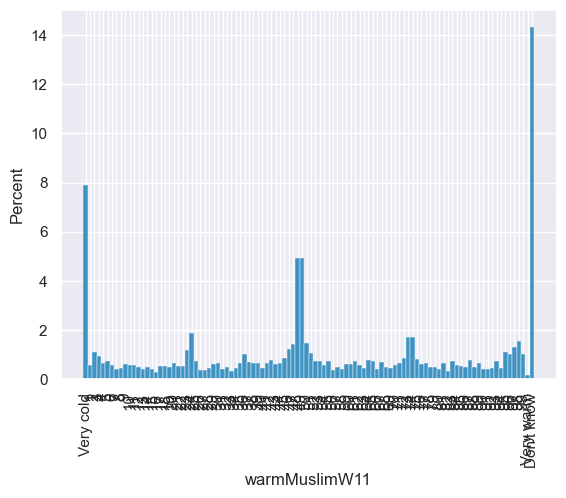

In [91]:
sns.histplot(x=BES_Panel_comb["warmMuslimW11"],weights=BES_Panel_comb["wt_new_W11"],stat='percent');
plt.xticks(rotation=90);

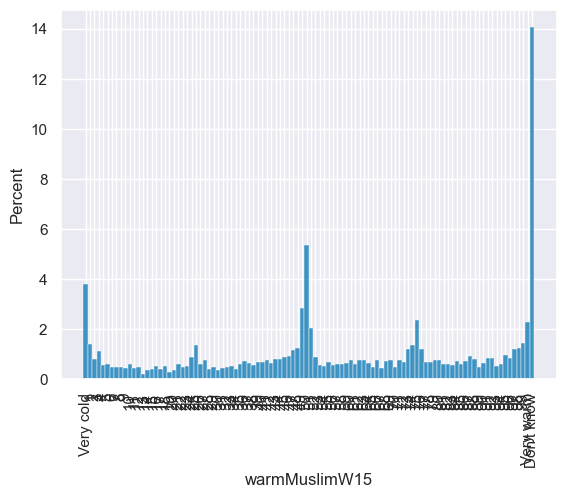

In [92]:
sns.histplot(x=BES_Panel_comb["warmMuslimW15"],weights=BES_Panel_comb["wt_new_W15"],stat='percent');
plt.xticks(rotation=90);

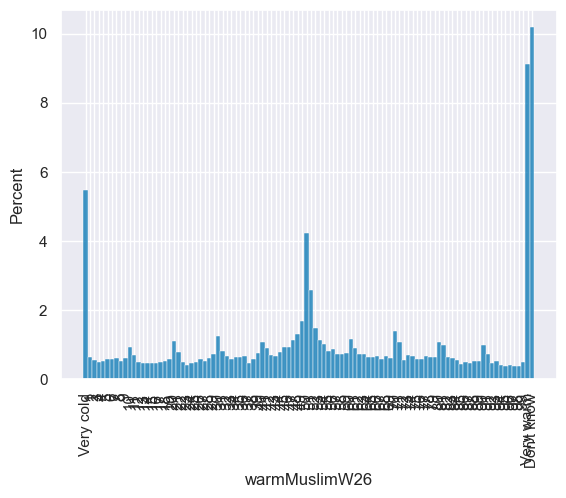

In [172]:
sns.histplot(x=BES_Panel_comb["warmMuslimW26"],weights=BES_Panel_comb["wt_new_W26"],stat='percent');
plt.xticks(rotation=90);

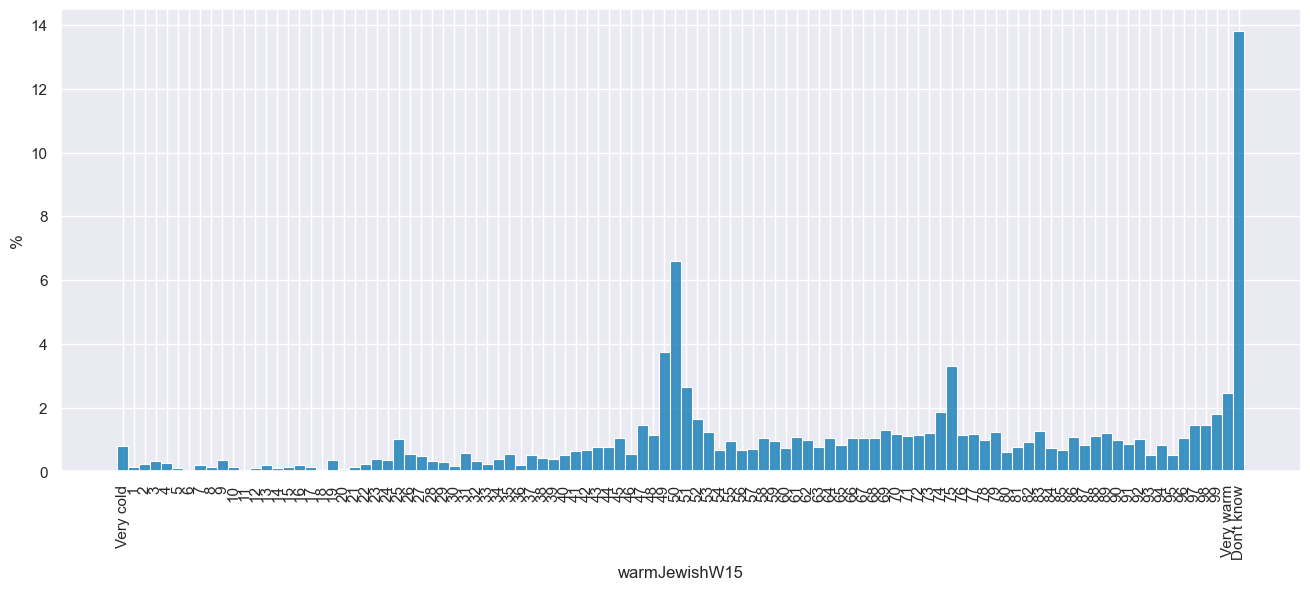

In [113]:
plt.figure(figsize=(16,6))
sns.histplot(x=BES_Panel_comb["warmJewishW15"],weights=BES_Panel_comb["wt_new_W26"],stat='percent');
plt.xticks(rotation=90);
plt.ylabel("%");

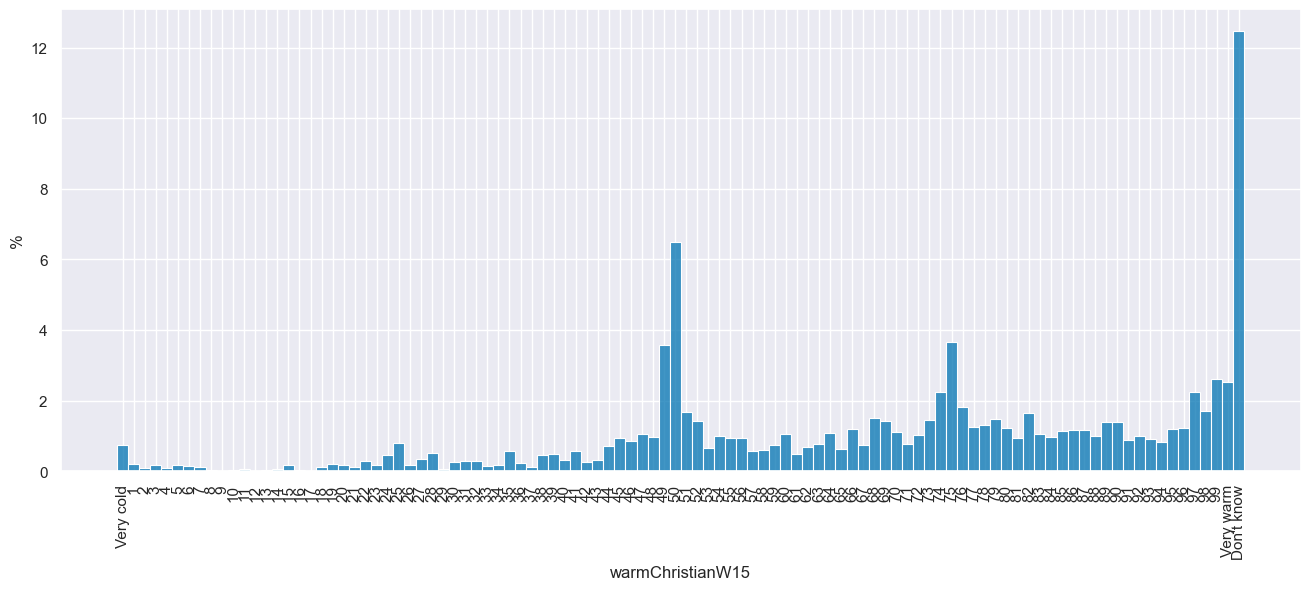

In [114]:
plt.figure(figsize=(16,6))
sns.histplot(x=BES_Panel_comb["warmChristianW15"],weights=BES_Panel_comb["wt_new_W26"],stat='percent');
plt.xticks(rotation=90);
plt.ylabel("%");

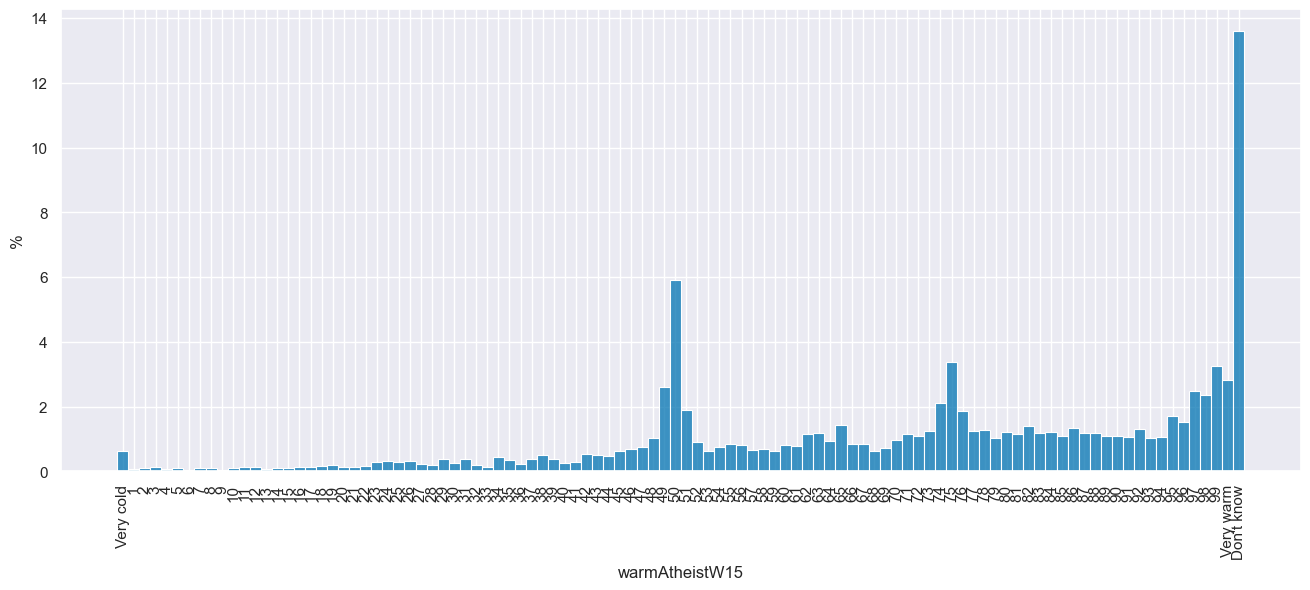

In [117]:
plt.figure(figsize=(16,6))
sns.histplot(x=BES_Panel_comb["warmAtheistW15"],weights=BES_Panel_comb["wt_new_W15"],stat='percent');
plt.xticks(rotation=90);
plt.ylabel("%");

In [176]:
def nice_hatch_bar_chart(temp,title,hue="wave",value="value",
                     hatches = ["//", "\\\\", "+","x","*","o","|","-","/",".","O","\\"], plot_func = sns.histplot,
                         order=None,y_label=""):
    fig = plt.figure(figsize=(8,4));
    ax = plt.gca()
    ax = plot_func(data=temp,y=value,x="variable",weights="wt",hue=hue,ax=ax,order=order);
#     ax = plot_func(data=temp,x=value,weights="wt",stat='percent',hue=hue,multiple="dodge", common_norm=False, shrink=.8,ax=ax);
    plt.title(title);
    plt.ylabel(y_label);
    plt.xlabel("");

    
    # iterate through each container, hatch, and legend handle
    for container, hatch, handle in zip(ax.containers, hatches, ax.get_legend().legend_handles[::-1]):
        # update the hatching in the legend handle
        handle.set_hatch(hatch)
        # iterate through each rectangle in the container
        for rectangle in container:
            # set the rectangle hatch
            rectangle.set_hatch(hatch)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    wrap_labels(ax, 10);
    plt.show()

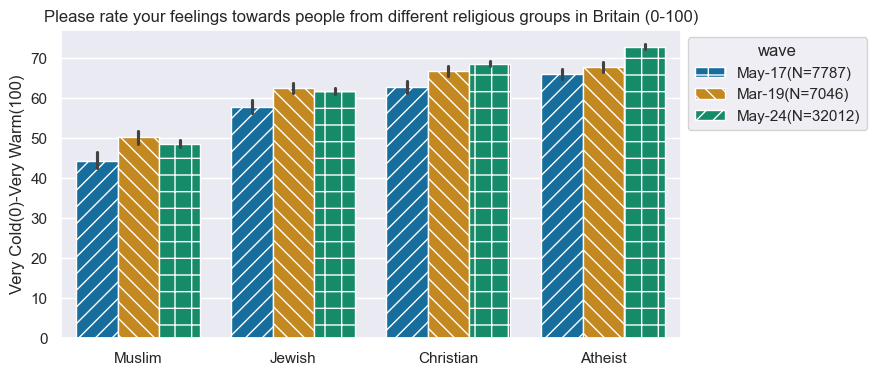

In [177]:
temp = BES_Panel_comb[search(BES_Panel_comb,"warmMuslim|warmJewish|warmChristian|warmAtheist|wt_new_W11$|wt_new_W26$|wt_new_W15$").index].melt(id_vars=["wt_new_W11","wt_new_W15","wt_new_W26",]).dropna()

temp["wt"] = temp.apply(lambda x: x["wt_new_W"+x["variable"].split("W")[1]],axis=1)
temp["wave"] = temp["variable"].apply(lambda x: "W"+x.split("W")[1])

temp["variable"] = temp["variable"].apply(lambda x: x.split("warm")[1].split("W")[0])
temp["value"] = temp["value"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
temp=temp.dropna() # drop the DKs

temp["wave"] = temp["wave"].replace({"W11":"May-17","W15":"Mar-19","W26":"May-24"})
vc = temp["wave"].value_counts()
temp["wave"] = temp["wave"].apply(lambda x: x+"(N="+str(vc.loc[x])+")")                                    
temp             

nice_hatch_bar_chart(temp,"Please rate your feelings towards people from different religious groups in Britain (0-100)",
                plot_func=sns.barplot,order = ["Muslim","Jewish","Christian","Atheist"],y_label="Very Cold(0)-Very Warm(100)")

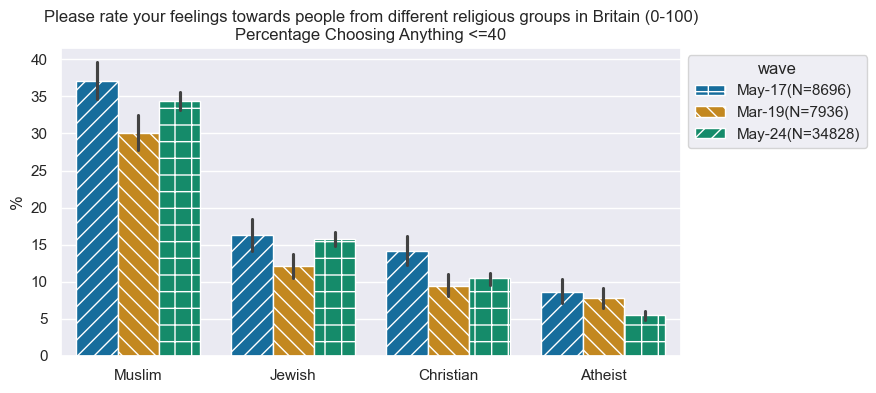

In [179]:
temp = BES_Panel_comb[search(BES_Panel_comb,"warmMuslim|warmJewish|warmChristian|warmAtheist|wt_new_W11$|wt_new_W26$|wt_new_W15$").index].melt(id_vars=["wt_new_W11","wt_new_W15","wt_new_W26",]).dropna()

temp["wt"] = temp.apply(lambda x: x["wt_new_W"+x["variable"].split("W")[1]],axis=1)
temp["wave"] = temp["variable"].apply(lambda x: "W"+x.split("W")[1])

temp["variable"] = temp["variable"].apply(lambda x: x.split("warm")[1].split("W")[0])
temp["value"] = (temp["value"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)<=40)*100
temp=temp.dropna() # drop the DKs

temp["wave"] = temp["wave"].replace({"W11":"May-17","W15":"Mar-19","W26":"May-24"})
vc = temp["wave"].value_counts()
temp["wave"] = temp["wave"].apply(lambda x: x+"(N="+str(vc.loc[x])+")")                                    
temp             

nice_hatch_bar_chart(temp,"Please rate your feelings towards people from different religious groups in Britain (0-100)\nPercentage Choosing Anything <=40",
                plot_func=sns.barplot,order = ["Muslim","Jewish","Christian","Atheist"],y_label="%")

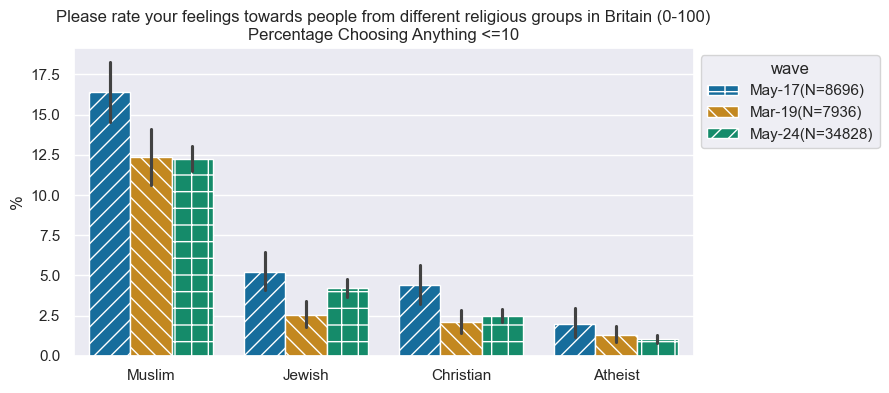

In [181]:
temp = BES_Panel_comb[search(BES_Panel_comb,"warmMuslim|warmJewish|warmChristian|warmAtheist|wt_new_W11$|wt_new_W26$|wt_new_W15$").index].melt(id_vars=["wt_new_W11","wt_new_W15","wt_new_W26",]).dropna()

temp["wt"] = temp.apply(lambda x: x["wt_new_W"+x["variable"].split("W")[1]],axis=1)
temp["wave"] = temp["variable"].apply(lambda x: "W"+x.split("W")[1])

temp["variable"] = temp["variable"].apply(lambda x: x.split("warm")[1].split("W")[0])
temp["value"] = (temp["value"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)<=10)*100
temp=temp.dropna() # drop the DKs

temp["wave"] = temp["wave"].replace({"W11":"May-17","W15":"Mar-19","W26":"May-24"})
vc = temp["wave"].value_counts()
temp["wave"] = temp["wave"].apply(lambda x: x+"(N="+str(vc.loc[x])+")")                                    
temp             

nice_hatch_bar_chart(temp,"Please rate your feelings towards people from different religious groups in Britain (0-100)\nPercentage Choosing Anything <=10",
                plot_func=sns.barplot,order = ["Muslim","Jewish","Christian","Atheist"],y_label="%")

In [94]:
# BES_Panel_comb[search(BES_Panel_comb,"p_religion").index].apply(lambda x: np.sum(x=="Yes - Islam"))
# 260-542

In [95]:
## (lab|con)LookAfter(Jews|Muslims) W15W26

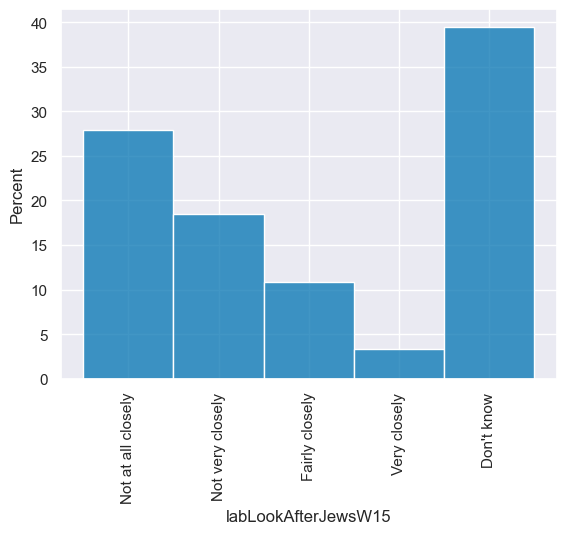

In [96]:
sns.histplot(x=BES_Panel_comb["labLookAfterJewsW15"],weights=BES_Panel_comb["wt_new_W15"],stat='percent');
plt.xticks(rotation=90);

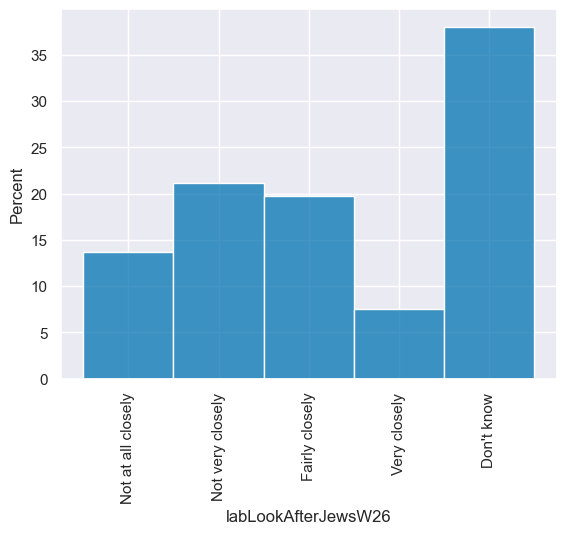

In [97]:
sns.histplot(x=BES_Panel_comb["labLookAfterJewsW26"],weights=BES_Panel_comb["wt_new_W26"],stat='percent');
plt.xticks(rotation=90);
# perception of Lab looking after Jews -> got more positive

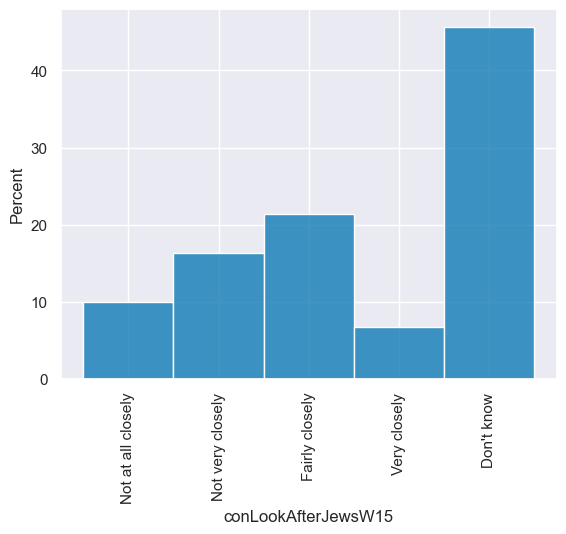

In [98]:
sns.histplot(x=BES_Panel_comb["conLookAfterJewsW15"],weights=BES_Panel_comb["wt_new_W15"],stat='percent');
plt.xticks(rotation=90);

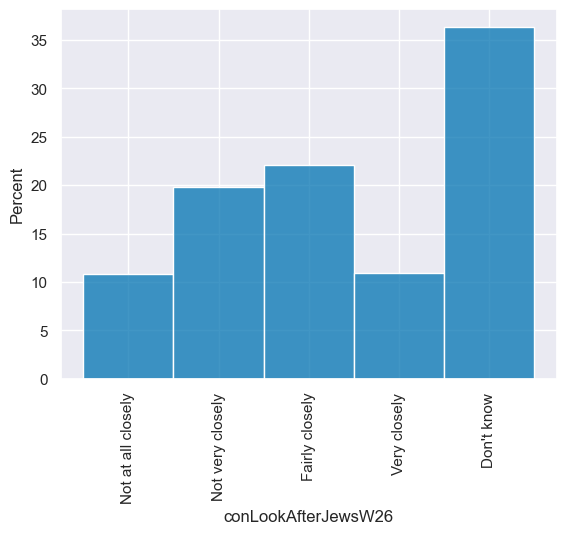

In [99]:
sns.histplot(x=BES_Panel_comb["conLookAfterJewsW26"],weights=BES_Panel_comb["wt_new_W26"],stat='percent');
plt.xticks(rotation=90);
# mostly seems that dk went down

In [100]:
search(BES_Panel_comb,"handleGazaGov|wt_new_W26$|wt_new_W27$|wt_new_W28$")

wt_new_W26          30064
wt_new_W27          30445
wt_new_W28          31582
handleGazaGovW26    30064
handleGazaGovW27    30445
dtype: int64

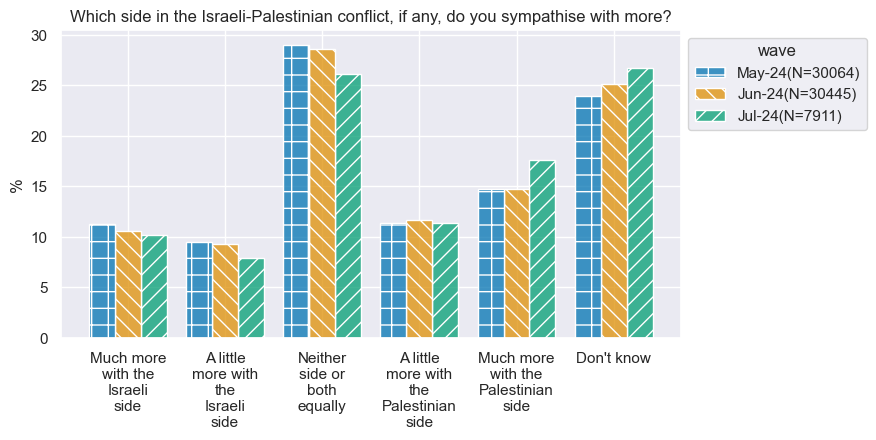

In [101]:
temp = BES_Panel_comb[search(BES_Panel_comb,"israelPalestine|wt_new_W26$|wt_new_W27$|wt_new_W28$").index].melt(id_vars=["wt_new_W26","wt_new_W27","wt_new_W28",]).dropna()

temp["wt"] = temp.apply(lambda x: x["wt_new_"+x["variable"].split("israelPalestine")[1]],axis=1)
temp["wave"] = temp["variable"].apply(lambda x: x.split("israelPalestine")[1])
temp["wave"] = temp["wave"].replace({"W26":"May-24(N=30064)","W27":"Jun-24(N=30445)","W28":"Jul-24(N=7911)"})

nice_hatch_chart(temp,"Which side in the Israeli-Palestinian conflict, if any, do you sympathise with more?")


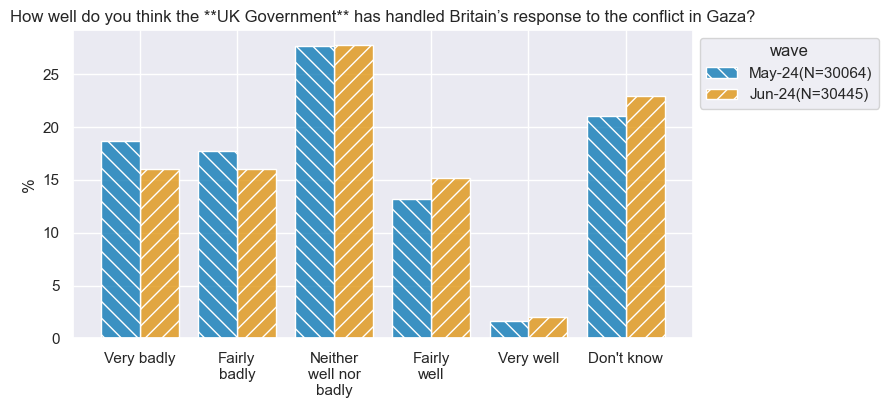

In [102]:
temp = BES_Panel_comb[search(BES_Panel_comb,"handleGazaGov|wt_new_W26$|wt_new_W27$").index].melt(id_vars=["wt_new_W26","wt_new_W27",]).dropna()

temp["wt"] = temp.apply(lambda x: x["wt_new_"+x["variable"].split("handleGazaGov")[1]],axis=1)
temp["wave"] = temp["variable"].apply(lambda x: x.split("handleGazaGov")[1])
temp["wave"] = temp["wave"].replace({"W26":"May-24(N=30064)","W27":"Jun-24(N=30445)"})

nice_hatch_chart(temp,"How well do you think the **UK Government** has handled Britain’s response to the conflict in Gaza?")

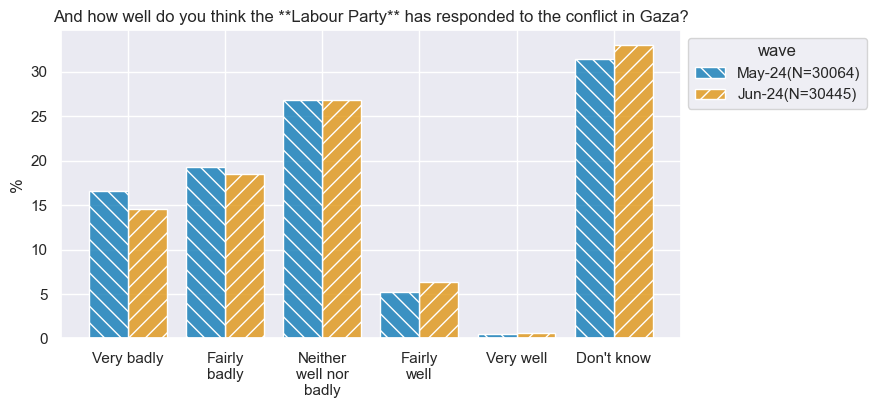

In [103]:
temp = BES_Panel_comb[search(BES_Panel_comb,"handleGazaLab|wt_new_W26$|wt_new_W27$").index].melt(id_vars=["wt_new_W26","wt_new_W27",]).dropna()

temp["wt"] = temp.apply(lambda x: x["wt_new_"+x["variable"].split("handleGazaLab")[1]],axis=1)
temp["wave"] = temp["variable"].apply(lambda x: x.split("handleGazaLab")[1])
temp["wave"] = temp["wave"].replace({"W26":"May-24(N=30064)","W27":"Jun-24(N=30445)"})

nice_hatch_chart(temp,"And how well do you think the **Labour Party** has responded to the conflict in Gaza?")